In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver


In [7]:
code = "^GSPC"
#begin_time = "2024-09-25"
begin_time = "2025-08-15"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_60M, KL_TYPE.K_30M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": True,
    "min_zs_cnt": 0,
    "bs1_peak": True,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})


In [8]:
plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}


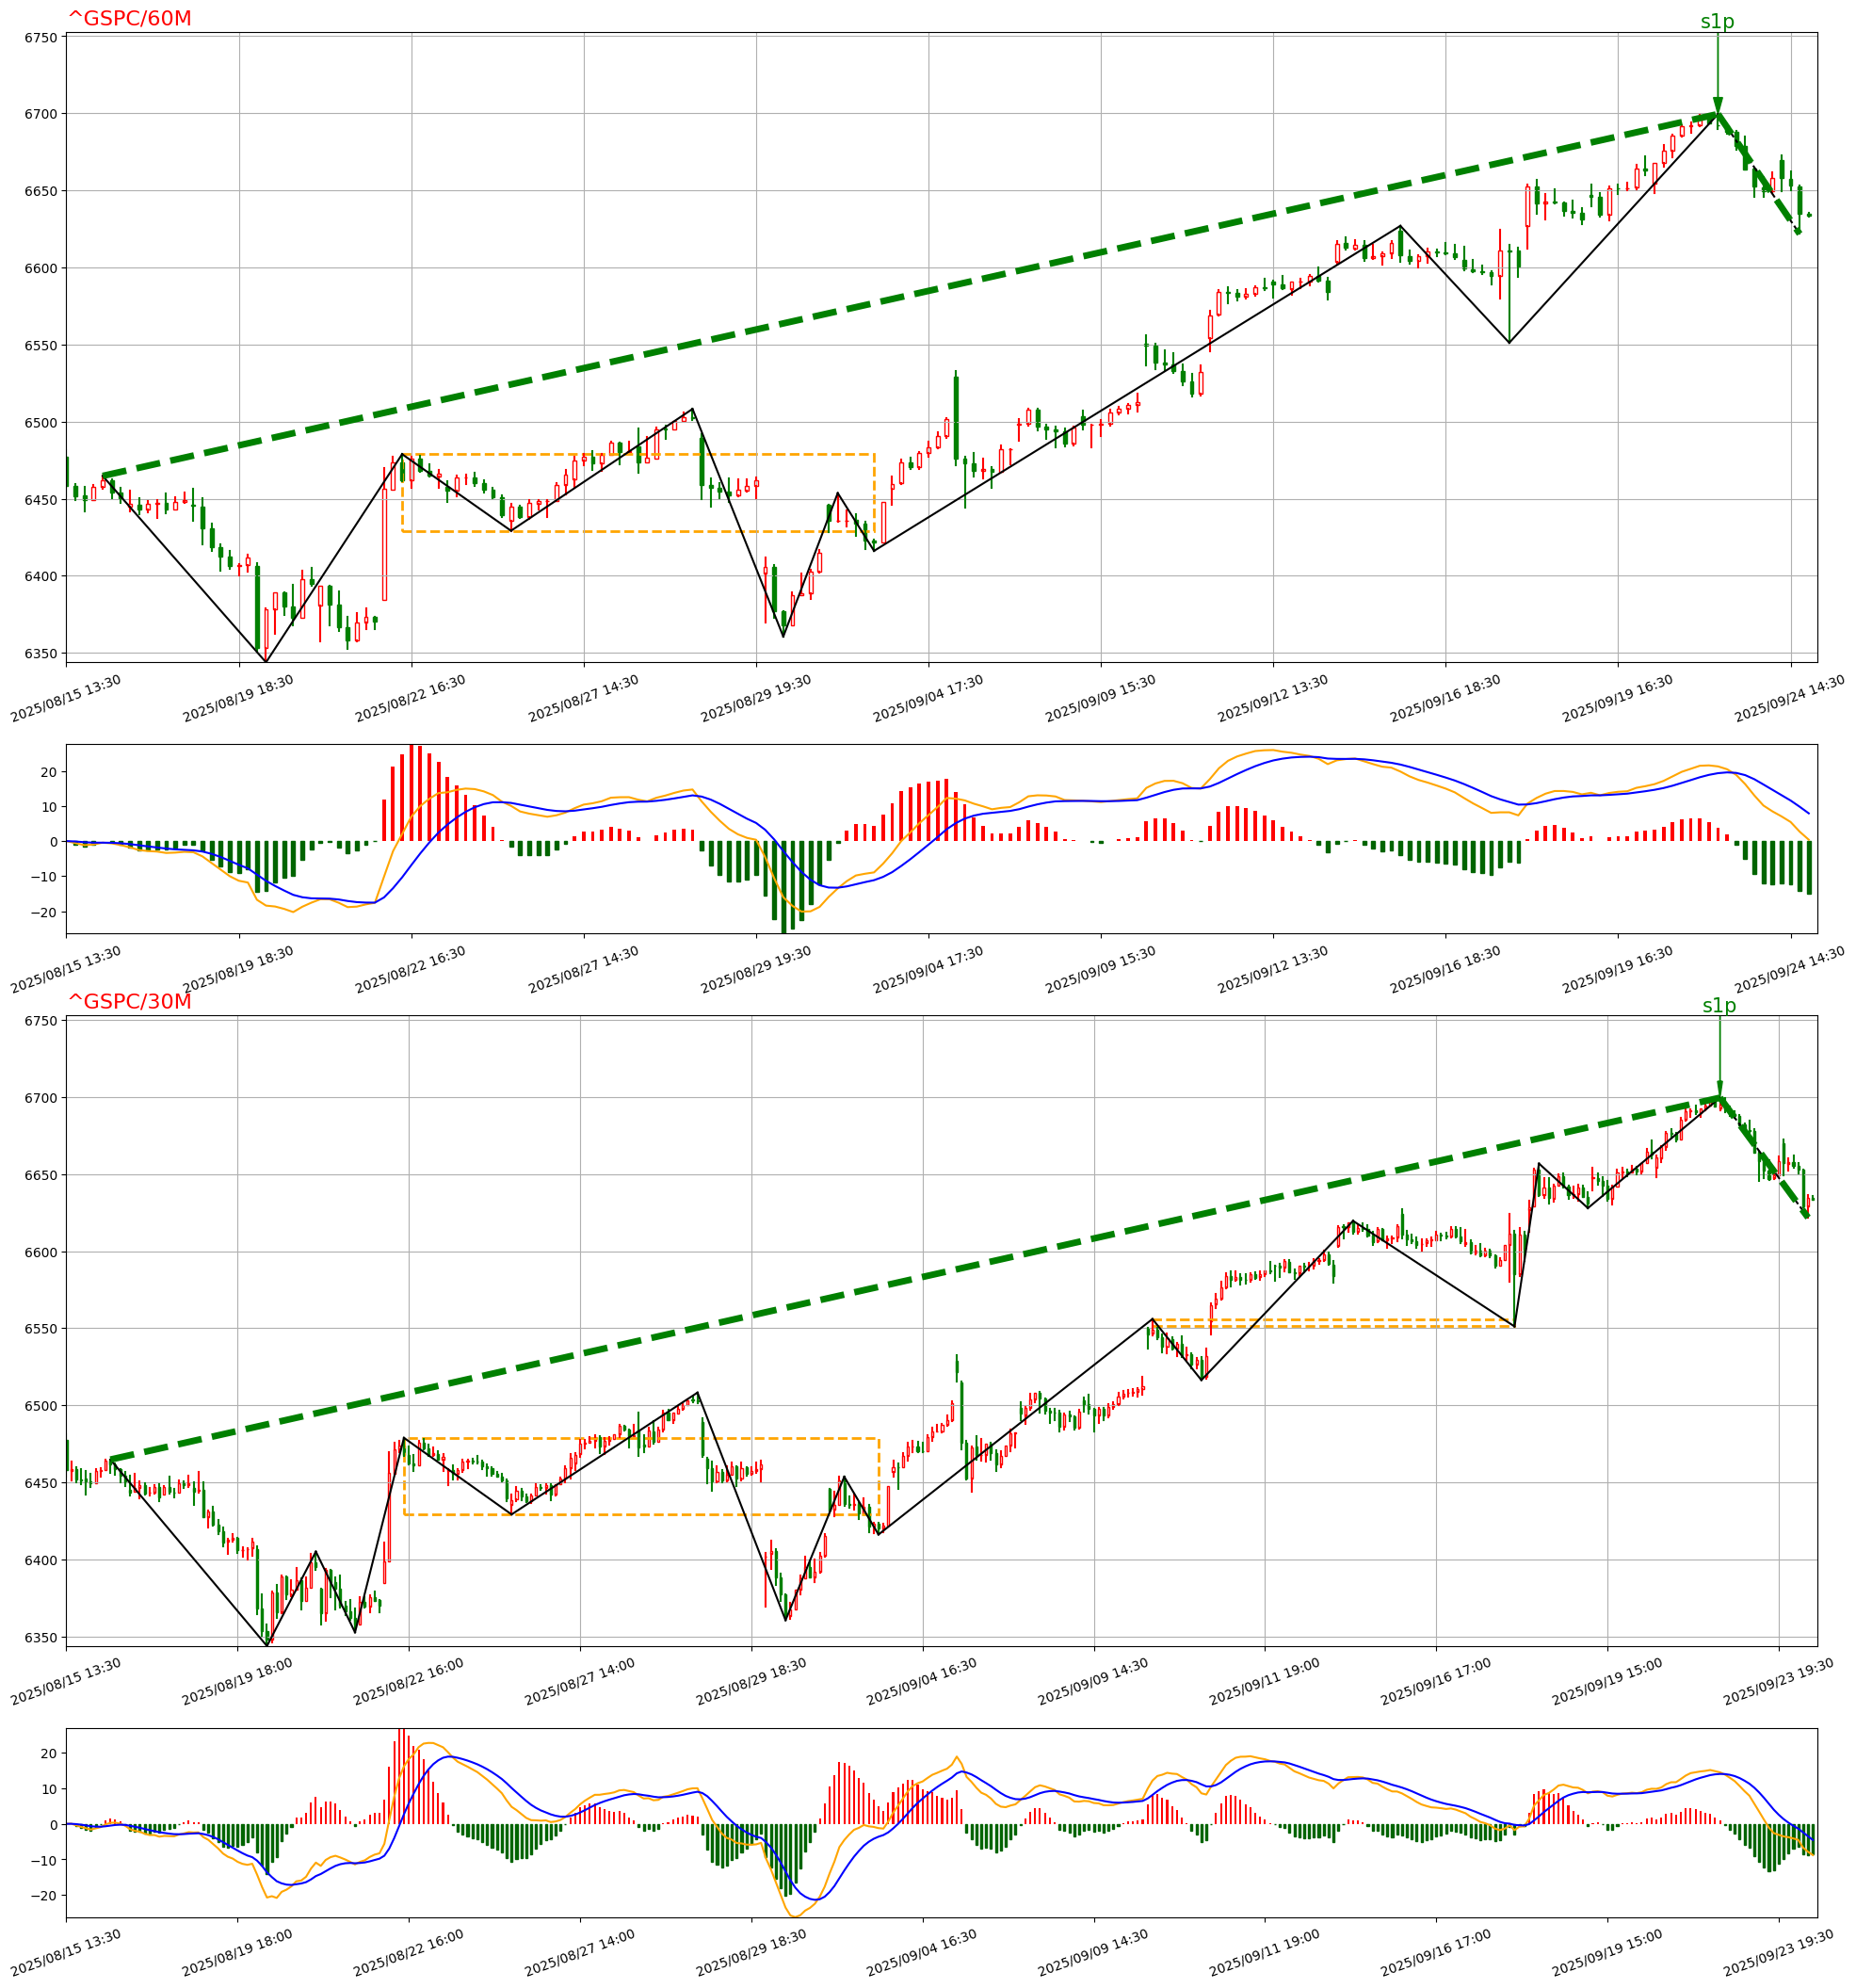

In [9]:
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

CSV_API: Processed 353206 lines, filtered to 71334 lines


C:\Users\TonyTang\AppData\Local\Temp\ipykernel_11388\1345187756.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_driver.figure.show()


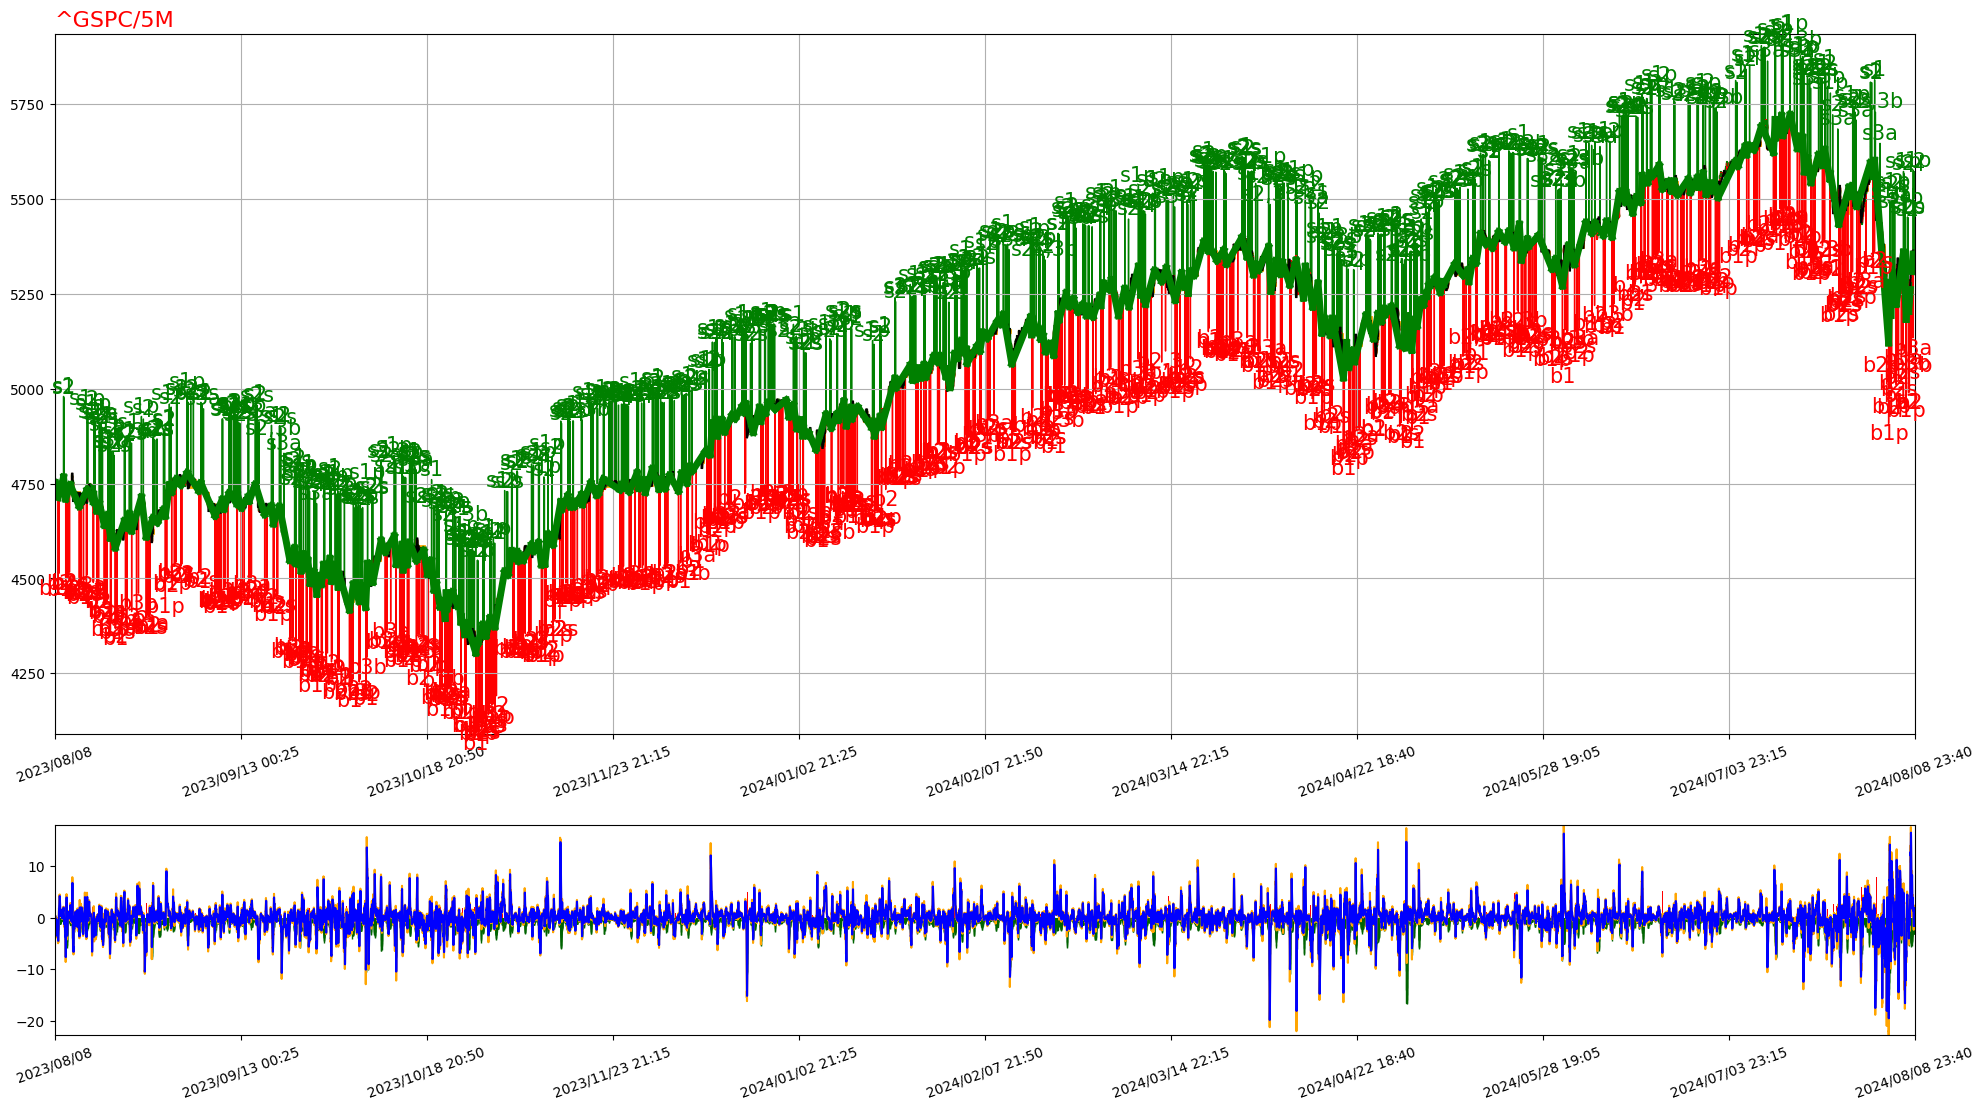

In [3]:
import sys


code = "^GSPC"
#begin_time = "2024-09-25"
begin_time = "2023-08-08"
end_time = "2024-08-08"
#end_time = None
data_src = DATA_SRC.CSV
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

sys.setrecursionlimit(500000)
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": True,
    "min_zs_cnt": 0,
    "bs1_peak": True,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# lv = chan.lv_list[0]  # 最低级别，比如 KL_TYPE.K_60M
# klu_list = chan[lv].lst  # 或者 chan[0].klu_list
# print("K线数量：", len(klu_list))
# print("前10个K线收盘价：", [klu.close for klu in klu_list[:10]])
# TRIGGER STEP = TRUE



plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
plot_driver.save2img("./NVDA5m.png")
plot_driver.figure.show()

# from utils.export_bs_features import export_bs_feature_files_by_type
# export_bs_feature_files_by_type(chan, KL_TYPE.K_5M, "./output/NVDA_5m_bs_types")


In [4]:
from utils.export_bs_features import export_bs_feature_files_by_type
export_bs_feature_files_by_type(chan, KL_TYPE.K_5M, "./output/GSPC_5m_bs_types")

[✓] Exported 230 '1p' BS points to: ./output/GSPC_5m_bs_types\bs_features_type_1p.csv
[✓] Exported 399 '2' BS points to: ./output/GSPC_5m_bs_types\bs_features_type_2.csv
[✓] Exported 178 '1' BS points to: ./output/GSPC_5m_bs_types\bs_features_type_1.csv
[✓] Exported 398 '2s' BS points to: ./output/GSPC_5m_bs_types\bs_features_type_2s.csv
[✓] Exported 82 '3a' BS points to: ./output/GSPC_5m_bs_types\bs_features_type_3a.csv
[✓] Exported 52 '3b' BS points to: ./output/GSPC_5m_bs_types\bs_features_type_3b.csv


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver
code = "^GSPC"
#begin_time = "2024-09-25"
begin_time = "2020-01-01"
end_time = "2024-08-08"
#end_time = None
data_src = DATA_SRC.CSV
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 1000000},
}

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 50,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
plot_driver.save2img("./NVDA5m.png")
plot_driver.figure.show()

# from Plot.AnimatePlotDriver import CAnimateDriver
# anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

CSV_API: Processed 353206 lines, filtered to 325603 lines


RecursionError: maximum recursion depth exceeded

In [ ]:
from utils.export_bs_features import export_bs_feature_files_by_type
export_bs_feature_files_by_type(chan, KL_TYPE.K_60M, "./output/NVDA_60m_bs_types")


In [ ]:
from utils.export_bs_features import export_bs_feature_files_by_type
from Chan import CChan
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
import pandas as pd
from ChanConfig import CChanConfig
import yfinance as yf
import os


# === Example ticker lists ===
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].tolist()
nasdaq100 = yf.Tickers(" ".join([
    "AAPL MSFT NVDA AMD GOOGL AMZN TSLA META NFLX INTC AVGO QCOM TXN MU ADI ORCL IBM"
])).tickers.keys()
dowjones = ["AAPL", "MSFT", "V", "UNH", "JNJ", "WMT", "JPM", "HD", "PG"]

def fix_symbol(sym):
    return sym.replace(".", "-")
# === Unified + deduplicated ===
tickers = sorted(set(sp500 + list(nasdaq100) + dowjones))
tickers = [fix_symbol(ticker) for ticker in tickers]
begin_time = "2025-05-12"
end_time = None
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.YAHOO_FINANCE
autype = AUTYPE.QFQ

# === 配置参数 ===
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

# === 输出主目录 ===
#main_output_dir = "./output/yfinance_day_bs_by_type"
main_output_dir = "./output/yfinance_5m_bs_by_type_07/10"
os.makedirs(main_output_dir, exist_ok=True)

# === 批量处理 ===
for code in tickers:
    try:
        print(f"\n[⏳] Processing: {code}")
        chan = CChan(
            code=code,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )

        output_dir = os.path.join(main_output_dir, f"{code}")
        export_bs_feature_files_by_type(chan, lv, output_dir)

    except Exception as e:
        print(f"[❌] Error processing {code}: {e}")




In [ ]:
import sys
print(sys.getrecursionlimit())

In [ ]:
import sys
sys.setrecursionlimit(30000)

import os
import pandas as pd
import yfinance as yf
from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from utils.export_bs_features import export_chain_features_by_type

def run_step_load(chan: CChan):
    """
    手动触发 step_load，用于捕捉 BS 点链条。
    """
    for _ in chan.step_load():
        pass  # 可以加进度条或打印进度

# 获取股票代码
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].tolist()
nasdaq100 = yf.Tickers(" ".join([
    "AAPL MSFT NVDA AMD GOOGL AMZN TSLA META NFLX INTC AVGO QCOM TXN MU ADI ORCL IBM"
])).tickers.keys()
dowjones = ["AAPL", "MSFT", "V", "UNH", "JNJ", "WMT", "JPM", "HD", "PG"]

def fix_symbol(sym):
    return sym.replace(".", "-")

tickers = sorted(set(sp500 + list(nasdaq100) + dowjones))
tickers = [fix_symbol(ticker) for ticker in tickers]

# 配置参数
begin_time = "2025-07-13"
end_time = None
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.YAHOO_FINANCE
autype = AUTYPE.QFQ

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,   # ✅ 关键：启用逐步推进，才能触发链追踪
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

# 输出路径
main_output_dir = "./output/yfinance_5m_bs_chains_08/07"
os.makedirs(main_output_dir, exist_ok=True)

# 主循环
for code in tickers:
    try:
        print(f"\n[⏳] Processing: {code}")
        chan = CChan(
            code=code,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )

        run_step_load(chan)

        output_dir = os.path.join(main_output_dir, f"{code}")
        export_chain_features_by_type(chan, lv, output_dir)

    except Exception as e:
        print(f"[❌] Error processing {code}: {e}")


[⏳] Processing test ticker: ^GSPC
CSV_API: Processed 353206 lines, filtered to 3036 lines
[🔍] Chain keys found: ["[<BSP_TYPE.T1P: '1p'>]_sell", "[<BSP_TYPE.T1: '1'>]_sell", "[<BSP_TYPE.T2: '2'>]_buy", "[<BSP_TYPE.T2S: '2s'>]_sell", "[<BSP_TYPE.T2S: '2s'>]_buy", "[<BSP_TYPE.T2: '2'>]_sell", "[<BSP_TYPE.T1: '1'>]_buy", "[<BSP_TYPE.T3A: '3a'>]_sell", "[<BSP_TYPE.T1P: '1p'>, <BSP_TYPE.T2S: '2s'>]_sell", "[<BSP_TYPE.T1P: '1p'>]_buy", "[<BSP_TYPE.T3A: '3a'>]_buy", "[<BSP_TYPE.T1: '1'>, <BSP_TYPE.T2S: '2s'>]_sell", "[<BSP_TYPE.T2: '2'>, <BSP_TYPE.T3B: '3b'>]_sell", "[<BSP_TYPE.T2: '2'>, <BSP_TYPE.T3B: '3b'>]_buy"]
[🔍] [<BSP_TYPE.T1P: '1p'>]_sell: 105 entries
[🔍] [<BSP_TYPE.T1: '1'>]_sell: 75 entries
[🔍] [<BSP_TYPE.T2: '2'>]_buy: 27 entries
[🔍] [<BSP_TYPE.T2S: '2s'>]_sell: 115 entries
[🔍] [<BSP_TYPE.T2S: '2s'>]_buy: 33 entries
[🔍] [<BSP_TYPE.T2: '2'>]_sell: 93 entries
[🔍] [<BSP_TYPE.T1: '1'>]_buy: 24 entries
[🔍] [<BSP_TYPE.T3A: '3a'>]_sell: 8 entries
[🔍] [<BSP_TYPE.T1P: '1p'>, <BSP_TYPE.T2S: '

C:\Users\TonyTang\AppData\Local\Temp\ipykernel_7912\3184893827.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  driver.figure.show()


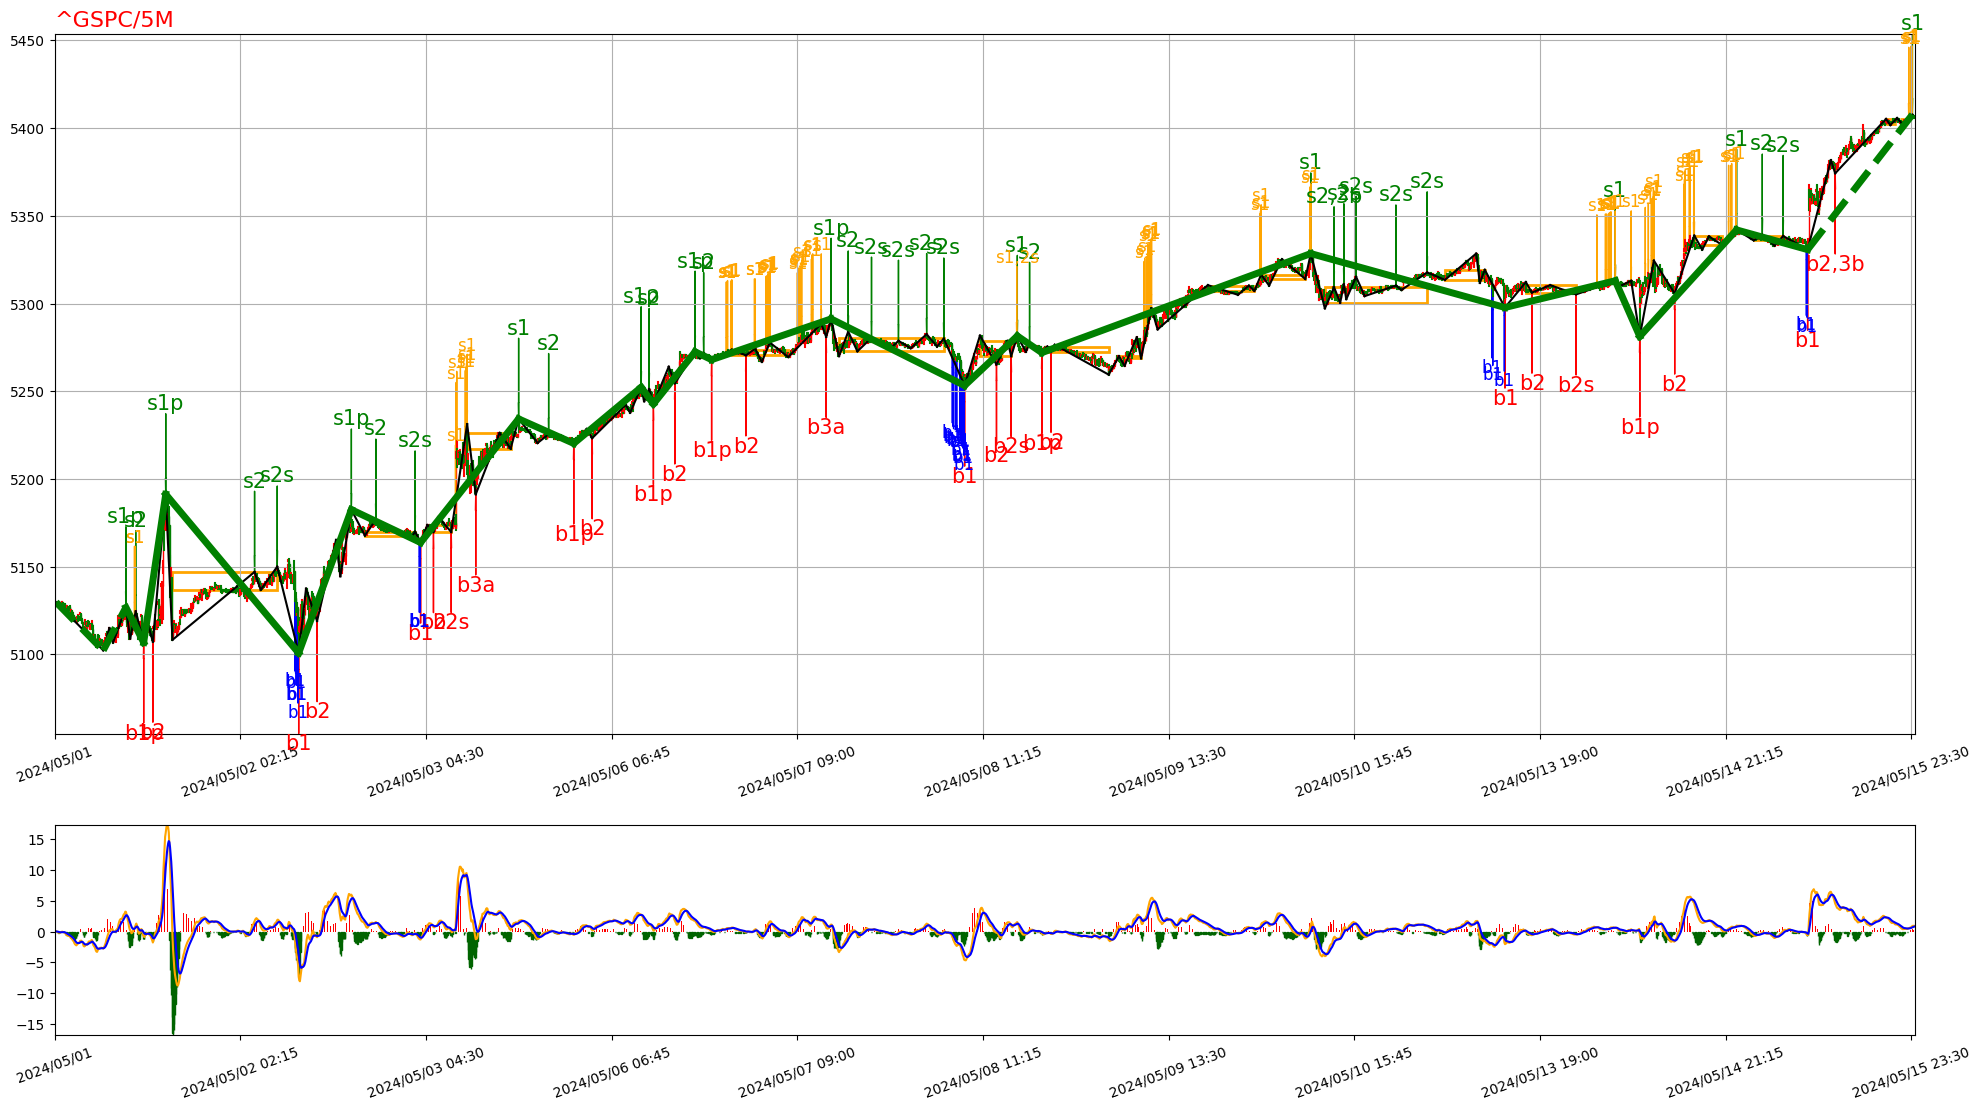

In [6]:
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from utils.export_bs_features import export_chain_features_by_type
from Plot.PlotDriver import CPlotDriver  # ✅ 添加这个
from matplotlib.pyplot import show

# Setup recursion limit
import sys
sys.setrecursionlimit(30000)

# 设置测试用代码
test_ticker = "^GSPC"

# symbol 格式兼容处理
def fix_symbol(sym):
    return sym.replace(".", "-")

# 配置参数
begin_time = "2024-05-01"
end_time = "2024-05-15"
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
#data_src = DATA_SRC.YAHOO_FINANCE
data_src = DATA_SRC.CSV
autype = AUTYPE.QFQ

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_bsc": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}

output_dir = "./output/test_yfinance_chain"
os.makedirs(output_dir, exist_ok=True)

# 定义加载函数
def run_step_load(chan: CChan):
    for _ in chan.step_load():
        pass

# 主流程
try:
    print(f"[⏳] Processing test ticker: {test_ticker}")
    chan = CChan(
        code=test_ticker,
        begin_time=begin_time,
        end_time=end_time,
        data_src=data_src,
        lv_list=lv_list,
        config=config,
        autype=autype
    )

    run_step_load(chan)
    # output_dir = os.path.join(main_output_dir, f"{test_ticker}")
    # chains_by_type = chan.bs_chain_tracker.chains_by_type
    # print(chains_by_type)
    # 查看链内容
    if hasattr(chan, "bs_chain_tracker"):
        tracker = chan.bs_chain_tracker
        chains = getattr(tracker, "chains_by_type", {})
        print("[🔍] Chain keys found:", list(chains.keys()))
        for key, chain in chains.items():
            print(f"[🔍] {key}: {len(chain)} entries")
    export_chain_features_by_type(chan, lv, output_dir)
    # ✅ 可视化：使用 PlotDriver 绘图并调用 draw_bsp_chain
    driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
    driver.figure.show()
    # # 选择绘制的级别（例如 "1"）
    # bs_type_str = "1"
    # for lv in chan.lv_list:
    #     meta = chan[lv].meta
    #     ax = driver.figure.axes[0]  # 默认使用第一个图
    #     driver.draw_bsp_chain(
    #         meta=meta,
    #         ax=ax,
    #         bs_type_str=bs_type_str,
    #         **plot_para.get("bsc", {})
    #     )

    # plt.show()

except Exception as e:
    print(f"[❌] Error: {e}")

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from Plot.PlotDriver import CPlotDriver

# Import the new consolidated export function
# Save the previous artifact as 'utils/consolidated_export.py'
from utils.extract_consolidated_bs_features import export_consolidated_bs_features, add_technical_features

# Setup recursion limit
sys.setrecursionlimit(30000)

# Configuration
test_ticker = "^GSPC"
begin_time = "2025-06-30"
end_time = None
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.YAHOO_FINANCE
autype = AUTYPE.QFQ

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_bsc": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}

# Setup output directory
output_dir = "./output/test_yfinance_chain"
os.makedirs(output_dir, exist_ok=True)

def run_step_load(chan: CChan):
    """Run step load to process all data"""
    for _ in chan.step_load():
        pass

def main():
    try:
        print(f"[⏳] Processing ticker: {test_ticker}")
        
        # Initialize Chan system
        chan = CChan(
            code=test_ticker,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )
        
        # Process data
        run_step_load(chan)
        
        # Export consolidated BS features to single file
        output_file = os.path.join(output_dir, f"{test_ticker}_all_bs_features.csv")
        df = export_consolidated_bs_features(
            chan=chan,
            lv=lv,
            output_path=output_file,
            add_targets=True,  # Add target labels for ML training
            forward_periods=[1, 5, 10, 20]  # Look ahead 1, 5, 10, 20 periods
        )
        
        # Optionally add more technical features
        if df is not None:
            df = add_technical_features(df)
            # Save enhanced version
            enhanced_output = os.path.join(output_dir, f"{test_ticker}_enhanced_features.csv")
            df.to_csv(enhanced_output, index=False)
            print(f"[💾] Saved enhanced features to: {enhanced_output}")
            
            # Display sample of the data
            print("\n[📋] Sample of extracted features:")
            print(df.head(10))
            
            # Display feature columns
            print("\n[📊] Available features for training:")
            feature_cols = [col for col in df.columns if col.startswith('feat_')]
            print(f"  Total feature columns: {len(feature_cols)}")
            print(f"  Sample features: {feature_cols[:10]}")
        
        # Visualization
        print("\n[🎨] Generating visualization...")
        driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
        
        # Save plot
        plot_path = os.path.join(output_dir, f"{test_ticker}_chart.png")
        driver.save2img(plot_path)
        print(f"[💾] Saved chart to: {plot_path}")
        
        # Show plot
        driver.figure.show()
        plt.show()
        
        print("\n[✅] Processing complete!")
        
        # Return the DataFrame for further processing
        return df
        
    except Exception as e:
        print(f"[❌] Error: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    # Run the main process
    bs_data = main()
    
    # You can now use bs_data DataFrame for training your model
    if bs_data is not None:
        print("\n[🚀] Ready for model training!")
        print(f"Dataset shape: {bs_data.shape}")
        
        # Example: Quick data quality check
        print("\n[🔍] Data Quality Check:")
        print(f"  Missing values: {bs_data.isnull().sum().sum()}")
        print(f"  Data types: {bs_data.dtypes.value_counts()}")
        
        # Example: Check class balance for classification
        if 'label_5' in bs_data.columns:
            label_dist = bs_data['label_5'].value_counts(normalize=True)
            print(f"\n[⚖️] Label distribution (5-period):")
            print(label_dist)

[⏳] Processing ticker: ^GSPC
YF.download() has changed argument auto_adjust default to True



1 Failed download:
['^GSPC']: YFPricesMissingError('possibly delisted; no price data found  (5m 2025-06-30 -> 2025-09-23 10:40:18-04:00) (Yahoo error = "5m data not available for startTime=1751256000 and endTime=1758638418. The requested range must be within the last 60 days.")')


[❌] Error: yfinance returned no data for symbol: ^GSPC


Traceback (most recent call last):
  File "C:\Users\TonyTang\AppData\Local\Temp\ipykernel_29404\3076268423.py", line 101, in main
    run_step_load(chan)
    ~~~~~~~~~~~~~^^^^^^
  File "C:\Users\TonyTang\AppData\Local\Temp\ipykernel_29404\3076268423.py", line 82, in run_step_load
    for _ in chan.step_load():
             ~~~~~~~~~~~~~~^^
  File "c:\Users\TonyTang\Documents\chan.py\Chan.py", line 152, in step_load
    for idx, snapshot in enumerate(self.load(step=True)):
                         ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\TonyTang\Documents\chan.py\Chan.py", line 252, in load
    yield from self.load_iterator(lv_idx=0, parent_klu=None, step=step)  # 计算入口
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\TonyTang\Documents\chan.py\Chan.py", line 297, in load_iterator
    kline_unit = self.get_next_lv_klu(lv_idx)
  File "c:\Users\TonyTang\Documents\chan.py\Chan.py", line 117, in get_next_lv_klu
    return self.g_kl_iter[lv_idx

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from Plot.PlotDriver import CPlotDriver

# Setup recursion limit
sys.setrecursionlimit(30000)

# Configuration
test_ticker = "^GSPC"
begin_time = "2020-01-01"
end_time = "2024-08-01"
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.CSV
autype = AUTYPE.QFQ

# Optimized config - no step processing
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    
    # NEW Moving Averages
    "cal_sma": True,
    "sma_periods": [5, 10, 20, 50],
    "cal_ema": True,
    "ema_periods": [12, 26, 50],
    
    # NEW Volatility & Momentum
    "cal_atr": True,
    "atr_cycle": 14,
    "cal_stochastic": True,
    "stoch_k_period": 14,
    "stoch_d_period": 3,
    "cal_roc": True,
    "roc_periods": [5, 10, 20],
    
    # NEW Oscillators
    "cal_williams": True,
    "williams_cycle": 14,
    "cal_cci": True,
    "cci_cycle": 20,
    "cal_mfi": True,
    "mfi_cycle": 14,
    "cal_tsi": True,
    "tsi_first_smooth": 25,
    "tsi_second_smooth": 13,
    "cal_uo": True,
    "uo_period1": 7,
    "uo_period2": 14,
    "uo_period3": 28,
    
    # NEW Trend Following
    "cal_psar": True,
    "psar_af_start": 0.02,
    "psar_af_increment": 0.02,
    "psar_af_max": 0.2,
    
    # NEW Pattern Recognition
    "cal_candlestick_patterns": True,
    "cal_price_patterns": True,
    "price_pattern_lookback": 20,
    "cal_volume_patterns": True,
    "volume_pattern_period": 20,
    "trigger_step": False,  # Changed to False for batch processing
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": False,  # Reduce console output for performance
    "zs_algo": "normal",
})

plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}

# Setup output directory
output_dir = "./output/test_optimized_bs_features"
os.makedirs(output_dir, exist_ok=True)


def export_bs_features_fast(
    chan: CChan, 
    lv: KL_TYPE, 
    output_path: str,
    add_targets: bool = True,
    forward_periods: list = [1, 5, 10]
) -> pd.DataFrame:
    """
    Fast BS feature extraction without maturity tracking
    """
    print(f"[📊] Extracting all BS points from level {lv}...")
    
    # Get all BS points directly (no step processing)
    bs_points = chan.kl_datas[lv].bs_point_lst.getSortedBspList()
    
    if not bs_points:
        print("[⚠️] No BS points found!")
        return pd.DataFrame()
    
    print(f"[✅] Found {len(bs_points)} BS points")
    
    # Feature mapping for consolidation
    feature_mappings = {
        '1': {
            'bi_amp': 'bsp1_bi_amp',
            'bi_klu_cnt': 'bsp1_bi_klu_cnt', 
            'bi_amp_rate': 'bsp1_bi_amp_rate',
        },
        '1p': {
            'bi_amp': 'bsp1_bi_amp',
            'bi_klu_cnt': 'bsp1_bi_klu_cnt',
            'bi_amp_rate': 'bsp1_bi_amp_rate', 
        },
        '2': {
            'bi_amp': 'bsp2_bi_amp',
            'bi_klu_cnt': 'bsp2_bi_klu_cnt',
            'bi_amp_rate': 'bsp2_bi_amp_rate',
            'retrace_rate': 'bsp2_retrace_rate',
            'break_bi_amp': 'bsp2_break_bi_amp',
            'break_bi_klu_cnt': 'bsp2_break_bi_bi_klu_cnt',
            'break_bi_amp_rate': 'bsp2_break_bi_amp_rate'
        },
        '2s': {
            'bi_amp': 'bsp2s_bi_amp',
            'bi_klu_cnt': 'bsp2s_bi_klu_cnt',
            'bi_amp_rate': 'bsp2s_bi_amp_rate',
            'retrace_rate': 'bsp2s_retrace_rate',
            'break_bi_amp': 'bsp2s_break_bi_amp',
            'break_bi_klu_cnt': 'bsp2s_break_bi_klu_cnt',
            'break_bi_amp_rate': 'bsp2s_break_bi_amp_rate',
            'bsp_level': 'bsp2s_lv'
        },
        '3a': {
            'bi_amp': 'bsp3_bi_amp',
            'bi_klu_cnt': 'bsp3_bi_klu_cnt',
            'bi_amp_rate': 'bsp3_bi_amp_rate',
            'zs_height': 'bsp3_zs_height'
        },
        '3b': {
            'bi_amp': 'bsp3_bi_amp', 
            'bi_klu_cnt': 'bsp3_bi_klu_cnt',
            'bi_amp_rate': 'bsp3_bi_amp_rate',
            'zs_height': 'bsp3_zs_height'
        }
    }
    
    all_rows = []
    
    for bsp in bs_points:
        # Extract base features
        base_features = bsp.features.to_dict() if bsp.features else {}
        
        # Process each type in the BSP
        for bs_type in bsp.type:
            bs_type_str = bs_type.value
            
            # Create consolidated feature dict
            row = {
                'klu_idx': bsp.klu.idx,
                'timestamp': str(bsp.klu.time),
                'klu_open': bsp.klu.open,
                'klu_high': bsp.klu.high,
                'klu_low': bsp.klu.low,
                'klu_close': bsp.klu.close,
                'klu_volume': getattr(bsp.klu, 'volume', None),
                'bsp_type': bs_type_str,
                'bsp_types': bsp.type2str(),  # Full type string
                'is_buy': int(bsp.is_buy),
                'is_segbsp': int(getattr(bsp, 'is_segbsp', False)),
                'direction': 'buy' if bsp.is_buy else 'sell',
                
                # Initialize consolidated features
                'bi_amp': None,
                'bi_klu_cnt': None,
                'bi_amp_rate': None,
                'retrace_rate': 0.0,
                'break_bi_amp': None,
                'break_bi_klu_cnt': None,
                'break_bi_amp_rate': None,
                'zs_height': None,
                'bsp_level': None,
            }
            
            # Map features based on type
            if bs_type_str in feature_mappings:
                mapping = feature_mappings[bs_type_str]
                
                for unified_feature, source_feature in mapping.items():
                    if source_feature and source_feature in base_features:
                        row[unified_feature] = base_features[source_feature]
            
            # Add all original features with feat_ prefix
            for key, value in base_features.items():
                row[f'feat_{key}'] = value
            
            all_rows.append(row)
    
    # Convert to DataFrame
    df = pd.DataFrame(all_rows)
    
    if df.empty:
        print("[⚠️] No data to process")
        return df
    
    # Sort by timestamp/index for chronological order
    df = df.sort_values('klu_idx').reset_index(drop=True)
    
    # Add target labels if requested
    if add_targets:
        print(f"[✅] Adding target labels for periods: {forward_periods}")
        
        for period in forward_periods:
            # Calculate future returns
            df[f'return_{period}'] = df['klu_close'].shift(-period) / df['klu_close'] - 1
            
            # Create binary labels based on direction and return
            df[f'label_{period}'] = df.apply(
                lambda row: (
                    1 if row['is_buy'] and row[f'return_{period}'] > 0
                    else 1 if not row['is_buy'] and row[f'return_{period}'] < 0
                    else 0
                ) if pd.notna(row[f'return_{period}']) else None,
                axis=1
            )
            
            # Add return magnitude
            df[f'return_abs_{period}'] = df[f'return_{period}'].abs()
    
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"[💾] Saved consolidated features to: {output_path}")
    
    # Summary statistics
    print(f"\n[📈] Summary:")
    print(f"  Total rows (point-type pairs): {len(df)}")
    print(f"  Unique BS points: {df['klu_idx'].nunique()}")
    
    if 'bsp_type' in df.columns:
        type_counts = df['bsp_type'].value_counts().sort_index()
        print("  Rows by BSP type:")
        for bsp_type, count in type_counts.items():
            print(f"    {bsp_type}: {count}")
    
    return df


def add_technical_features(df: pd.DataFrame) -> pd.DataFrame:
    """Add additional technical indicators as features"""
    if df.empty:
        return df

    print("[✅] Adding technical features...")
    
    # Price-based features
    df['price_change'] = df['klu_close'] - df['klu_open']
    df['price_change_pct'] = df['price_change'] / df['klu_open']
    df['high_low_spread'] = df['klu_high'] - df['klu_low']
    df['high_low_spread_pct'] = df['high_low_spread'] / df['klu_low']
    
    # Volume features (if available)
    if 'klu_volume' in df.columns and df['klu_volume'].notna().any():
        df['volume_ma5'] = df['klu_volume'].rolling(5).mean()
        df['volume_ratio'] = df['klu_volume'] / df['volume_ma5']
    
    # MACD features (if available)
    if 'feat_macd_value' in df.columns:
        df['macd_signal'] = (df['feat_macd_value'] > 0).astype(int)
        df['macd_cross'] = df['macd_signal'].diff()
    
    # RSI features (if available)
    if 'feat_rsi' in df.columns:
        df['rsi_oversold'] = (df['feat_rsi'] < 30).astype(int)
        df['rsi_overbought'] = (df['feat_rsi'] > 70).astype(int)
    
    # KDJ features (if available)
    if 'feat_kdj_k' in df.columns:
        df['kdj_k_oversold'] = (df['feat_kdj_k'] < 20).astype(int)
        df['kdj_k_overbought'] = (df['feat_kdj_k'] > 80).astype(int)
    
    # DMI features (if available)
    if 'feat_plus_di' in df.columns and 'feat_minus_di' in df.columns:
        df['dmi_trend_up'] = (df['feat_plus_di'] > df['feat_minus_di']).astype(int)
    
    return df


def create_ml_ready_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """Prepare dataset for machine learning"""
    if df.empty:
        return df
    
    print("[🔧] Preparing ML-ready dataset...")
    
    # Select feature columns
    feature_cols = [col for col in df.columns if col.startswith('feat_')]
    
    # Add consolidated features
    consolidated_features = ['bi_amp', 'bi_klu_cnt', 'bi_amp_rate', 'retrace_rate', 
                           'break_bi_amp', 'break_bi_klu_cnt', 'break_bi_amp_rate', 
                           'zs_height', 'bsp_level']
    
    available_consolidated = [col for col in consolidated_features if col in df.columns]
    
    # Add technical features
    tech_features = ['price_change_pct', 'high_low_spread_pct', 'volume_ratio',
                    'macd_signal', 'rsi_oversold', 'rsi_overbought',
                    'kdj_k_oversold', 'kdj_k_overbought', 'dmi_trend_up']
    
    available_tech = [col for col in tech_features if col in df.columns]
    
    # Combine all features
    all_features = feature_cols + available_consolidated + available_tech
    
    # Base columns to keep
    base_cols = ['klu_idx', 'timestamp', 'bsp_type', 'is_buy', 'direction']
    
    # Target columns
    target_cols = [col for col in df.columns if col.startswith(('label_', 'return_'))]
    
    # Select final columns
    final_cols = base_cols + all_features + target_cols
    available_cols = [col for col in final_cols if col in df.columns]
    
    ml_df = df[available_cols].copy()
    
    # Handle missing values for features
    feature_columns = [col for col in all_features if col in ml_df.columns]
    ml_df[feature_columns] = ml_df[feature_columns].fillna(0)
    
    print(f"[✅] ML dataset ready with {len(feature_columns)} features")
    
    return ml_df


def main():
    try:
        print(f"[⏳] Processing ticker: {test_ticker}")
        print("[🚀] Using optimized batch processing (no step load)...")
        
        # Initialize Chan system
        chan = CChan(
            code=test_ticker,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )
        
        # Note: No step_load() needed - Chan processes all data at once
        print("[✅] Data processing complete!")
        
        # Export BS features to single file
        output_file = os.path.join(output_dir, f"{test_ticker}_bs_features_fast.csv")
        df = export_bs_features_fast(
            chan=chan,
            lv=lv,
            output_path=output_file,
            add_targets=True,
            forward_periods=[1, 5, 10, 20]
        )
        
        # Add more technical features
        if df is not None and not df.empty:
            df = add_technical_features(df)
            
            # Create ML-ready dataset
            ml_df = create_ml_ready_dataset(df)
            
            # Save enhanced version
            enhanced_output = os.path.join(output_dir, f"{test_ticker}_ml_ready.csv")
            ml_df.to_csv(enhanced_output, index=False)
            print(f"[💾] Saved ML-ready dataset to: {enhanced_output}")
            
            # Display sample of the data
            print("\n[📋] Sample of extracted features:")
            display_cols = ['klu_idx', 'bsp_type', 'direction', 'bi_amp', 'bi_klu_cnt', 'retrace_rate']
            available_cols = [col for col in display_cols if col in df.columns]
            print(df[available_cols].head(10))
            
            # Display feature summary
            feature_cols = [col for col in ml_df.columns if col.startswith('feat_')]
            consolidated_cols = ['bi_amp', 'bi_klu_cnt', 'bi_amp_rate', 'retrace_rate']
            available_consolidated = [col for col in consolidated_cols if col in ml_df.columns]
            
            print(f"\n[📊] Dataset Summary:")
            print(f"  Total samples: {len(ml_df)}")
            print(f"  Feature columns: {len(feature_cols)}")
            print(f"  Consolidated features: {len(available_consolidated)}")
            print(f"  BSP types: {df['bsp_type'].unique()}")
            
            # Check data distribution
            if 'label_5' in ml_df.columns:
                label_dist = ml_df['label_5'].value_counts(normalize=True)
                print(f"\n[⚖️] Label distribution (5-period):")
                for label, pct in label_dist.items():
                    print(f"    {label}: {pct:.2%}")
        
        # Optional: Generate visualization (comment out for large datasets)
        if len(chan[0]) < 10000:  # Only plot for smaller datasets
            print("\n[🎨] Generating visualization...")
            driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
            
            # Save plot
            plot_path = os.path.join(output_dir, f"{test_ticker}_chart.png")
            driver.save2img(plot_path)
            print(f"[💾] Saved chart to: {plot_path}")
            
            # Show plot
            driver.figure.show()
            plt.show()
        else:
            print("[ℹ️] Skipping visualization for large dataset")
        
        print("\n[✅] Fast processing complete!")
        
        return df
        
    except Exception as e:
        print(f"[❌] Error: {e}")
        import traceback
        traceback.print_exc()
        return None


if __name__ == "__main__":
    import time
    
    # Time the process
    start_time = time.time()
    
    # Run the main process
    bs_data = main()
    
    end_time = time.time()
    print(f"\n⏱️ Total processing time: {end_time - start_time:.2f} seconds")
    
    # You can now use bs_data DataFrame for training your model
    if bs_data is not None and not bs_data.empty:
        print("\n[🚀] Ready for model training!")
        print(f"Dataset shape: {bs_data.shape}")
        
        # Example: Quick data quality check
        print("\n[🔍] Data Quality Check:")
        print(f"  Missing values: {bs_data.isnull().sum().sum()}")
        print(f"  Numeric columns: {bs_data.select_dtypes(include=['number']).shape[1]}")
        
        # Show feature importance readiness
        feature_cols = [col for col in bs_data.columns if col.startswith('feat_') or 
                       col in ['bi_amp', 'bi_klu_cnt', 'bi_amp_rate', 'retrace_rate']]
        print(f"  Features ready for training: {len(feature_cols)}")
        
        # Save final feature list for reference
        feature_list_path = os.path.join(output_dir, "feature_list.txt")
        with open(feature_list_path, 'w') as f:
            f.write("Available Features for ML Training:\n")
            f.write("=" * 40 + "\n")
            for i, feature in enumerate(sorted(feature_cols), 1):
                f.write(f"{i:3d}. {feature}\n")
        
        print(f"[📝] Feature list saved to: {feature_list_path}")
        
    else:
        print("[❌] No data was processed successfully.")

[⏳] Processing ticker: ^GSPC
[🚀] Using optimized batch processing (no step load)...
CSV_API: Processed 353206 lines, filtered to 324223 lines
[✅] Data processing complete!
[📊] Extracting all BS points from level KL_TYPE.K_5M...
[✅] Found 6625 BS points
[✅] Adding target labels for periods: [1, 5, 10, 20]
[💾] Saved consolidated features to: ./output/test_optimized_bs_features\^GSPC_bs_features_fast.csv

[📈] Summary:
  Total rows (point-type pairs): 6851
  Unique BS points: 6625
  Rows by BSP type:
    1: 980
    1p: 1149
    2: 2090
    2s: 1844
    3a: 479
    3b: 309
[✅] Adding technical features...
[🔧] Preparing ML-ready dataset...
[✅] ML dataset ready with 52 features
[💾] Saved ML-ready dataset to: ./output/test_optimized_bs_features\^GSPC_ml_ready.csv

[📋] Sample of extracted features:
   klu_idx bsp_type direction  bi_amp  bi_klu_cnt  retrace_rate
0      142       1p      sell   12.50          65      0.000000
1      196       1p       buy   15.25          18      0.000000
2      

In [9]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from Plot.PlotDriver import CPlotDriver

# Setup recursion limit
sys.setrecursionlimit(30000)

# Configuration
test_ticker = "^GSPC"
begin_time = "2020-01-01"
end_time = "2024-05-01"
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.CSV
autype = AUTYPE.QFQ

# Enhanced config with all new indicators
config = CChanConfig({
    # Existing indicators
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    
    # Chan settings
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": False,
    "zs_algo": "normal",
})

plot_config = {
    "plot_kline": True,
    "plot_kline_combine": False,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_bsp": True,
}

plot_para = {
    "figure": {"x_range": 100000},
}

# Setup output directory
output_dir = "./output/enhanced_bs_features"
os.makedirs(output_dir, exist_ok=True)


def calculate_best_reverse_profit_targets(bs_points):
    """
    FIXED LOGIC: For each BSP point, find the NEXT reverse direction point
    and calculate profit target percentage.
    
    For BUY points: Find the next SELL point
    For SELL points: Find the next BUY point
    
    Every point should have a profit target unless it's the last point.
    """
    print("[🎯] Calculating next reverse profit targets...")
    
    profit_targets = {}
    
    for i, bsp in enumerate(bs_points):
        current_direction = bsp.is_buy  # True for buy, False for sell
        entry_price = bsp.klu.close
        entry_idx = bsp.klu.idx
        
        # Initialize profit target info
        profit_targets[entry_idx] = {
            'profit_target_price': None,
            'profit_target_pct': None,
            'profit_target_klu_idx': None,
            'profit_target_type': None,
            'profit_target_distance': None,
            'next_reverse_idx': None,
        }
        
        # Find the NEXT reverse direction BSP point
        next_reverse_bsp = None
        next_reverse_idx = None
        
        for j in range(i + 1, len(bs_points)):
            future_bsp = bs_points[j]
            # Check if this is opposite direction (reverse)
            if future_bsp.is_buy != current_direction:
                next_reverse_bsp = future_bsp
                next_reverse_idx = j
                break  # Take the first (next) reverse point
        
        # If no reverse point found, this point has no profit target
        if next_reverse_bsp is None:
            print(f"[⚠️] BSP {i} (idx {entry_idx}): No more reverse points found after this {'BUY' if current_direction else 'SELL'}")
            continue
        
        # Calculate profit percentage
        exit_price = next_reverse_bsp.klu.close
        
        if current_direction:  # Current is BUY - exit at SELL
            profit_pct = (exit_price - entry_price) / entry_price * 100
        else:  # Current is SELL - exit at BUY
            profit_pct = (entry_price - exit_price) / entry_price * 100
        
        # Store the results
        profit_targets[entry_idx] = {
            'profit_target_price': exit_price,
            'profit_target_pct': profit_pct,
            'profit_target_klu_idx': next_reverse_bsp.klu.idx,
            'profit_target_type': next_reverse_bsp.type2str(),
            'profit_target_distance': next_reverse_bsp.klu.idx - entry_idx,
            'next_reverse_idx': next_reverse_idx,
            'entry_direction': 'buy' if current_direction else 'sell',
            'exit_direction': 'sell' if current_direction else 'buy'
        }
        
        direction_str = 'BUY' if current_direction else 'SELL'
        reverse_direction_str = 'SELL' if current_direction else 'BUY'
        print(f"[✅] BSP {i}: {direction_str} at {entry_price:.2f} -> next {reverse_direction_str} at {exit_price:.2f} = {profit_pct:.2f}%")
    
    # Print summary statistics
    valid_targets = [v for v in profit_targets.values() if v['profit_target_pct'] is not None]
    if valid_targets:
        profits = [v['profit_target_pct'] for v in valid_targets]
        distances = [v['profit_target_distance'] for v in valid_targets]
        
        print(f"\n[📊] Next Reverse Profit Target Summary:")
        print(f"  Total BSP points: {len(bs_points)}")
        print(f"  Points with valid targets: {len(valid_targets)}")
        print(f"  Points without targets: {len(bs_points) - len(valid_targets)} (likely last points)")
        print(f"  Coverage: {len(valid_targets)/len(bs_points)*100:.1f}%")
        print(f"  Average profit: {sum(profits)/len(profits):.2f}%")
        print(f"  Best profit: {max(profits):.2f}%")
        print(f"  Worst result: {min(profits):.2f}%")
        print(f"  Average distance: {sum(distances)/len(distances):.1f} periods")
        print(f"  Profitable trades: {sum(1 for p in profits if p > 0)}/{len(profits)} ({sum(1 for p in profits if p > 0)/len(profits)*100:.1f}%)")
        
        # Check for zeros
        zeros = sum(1 for p in profits if abs(p) < 0.001)
        if zeros > 0:
            print(f"  ⚠️ Near-zero profits: {zeros} (entry and exit prices are identical)")
    else:
        print(f"[⚠️] No valid profit targets calculated!")
    
    return profit_targets


def debug_bsp_sequence(bs_points, max_points=20):
    """
    Debug function to show the sequence of BSP points and the next reverse logic
    """
    print(f"\n[🔍] Debugging BSP sequence (first {max_points} points):")
    print("=" * 100)
    
    for i, bsp in enumerate(bs_points[:max_points]):
        direction = "BUY " if bsp.is_buy else "SELL"
        type_str = bsp.type2str()
        price = bsp.klu.close
        idx = bsp.klu.idx
        
        print(f"BSP {i:2d}: {direction} {type_str:4s} at idx {idx:5d}, price {price:8.2f}")
        
        # Find next reverse direction point
        next_reverse_idx = None
        next_reverse_bsp = None
        
        for j in range(i + 1, len(bs_points)):
            future_bsp = bs_points[j]
            if future_bsp.is_buy != bsp.is_buy:  # Opposite direction
                next_reverse_idx = j
                next_reverse_bsp = future_bsp
                break
        
        if next_reverse_bsp:
            reverse_direction = "BUY " if next_reverse_bsp.is_buy else "SELL"
            reverse_price = next_reverse_bsp.klu.close
            
            # Calculate profit
            if bsp.is_buy:
                profit_pct = (reverse_price - price) / price * 100
            else:
                profit_pct = (price - reverse_price) / price * 100
            
            print(f"         Next reverse: BSP {next_reverse_idx} ({reverse_direction}) at idx {next_reverse_bsp.klu.idx}, price {reverse_price:.2f}")
            print(f"         Profit: {profit_pct:.2f}%")
        else:
            print(f"         No more reverse points found")
        
        print()


def validate_profit_calculation(bs_points, profit_targets):
    """
    Validate the profit calculation by checking a few examples manually
    """
    print(f"\n[🔍] Validating profit calculations...")
    
    validation_count = 0
    for i, bsp in enumerate(bs_points[:10]):  # Check first 10
        entry_idx = bsp.klu.idx
        if entry_idx not in profit_targets:
            print(f"BSP {i}: No profit target calculated")
            continue
            
        target_info = profit_targets[entry_idx]
        if target_info['profit_target_pct'] is None:
            print(f"BSP {i}: Profit target is None")
            continue
        
        entry_price = bsp.klu.close
        exit_price = target_info['profit_target_price']
        calculated_pct = target_info['profit_target_pct']
        
        # Manual calculation
        if bsp.is_buy:
            expected_pct = (exit_price - entry_price) / entry_price * 100
        else:
            expected_pct = (entry_price - exit_price) / entry_price * 100
        
        print(f"BSP {i}: {'BUY' if bsp.is_buy else 'SELL'} {entry_price:.2f} -> {exit_price:.2f}")
        print(f"  Calculated: {calculated_pct:.4f}%, Expected: {expected_pct:.4f}%")
        
        if abs(calculated_pct - expected_pct) > 0.01:
            print(f"  ❌ MISMATCH!")
        else:
            print(f"  ✅ Match")
        
        validation_count += 1
        if validation_count >= 5:
            break


def export_enhanced_bs_features(
    chan: CChan, 
    lv: KL_TYPE, 
    output_path: str,
    add_targets: bool = True,
    forward_periods: list = [1, 5, 10, 20],
    debug_mode: bool = True
) -> pd.DataFrame:
    """
    Enhanced BS feature extraction with BEST REVERSE profit target logic
    """
    print(f"[📊] Extracting enhanced BS features from level {lv}...")
    
    bs_points = chan.kl_datas[lv].bs_point_lst.getSortedBspList()
    
    if not bs_points:
        print("[⚠️] No BS points found!")
        return pd.DataFrame()
    
    print(f"[✅] Found {len(bs_points)} BS points")
    
    # Debug: Show sequence of BSP points
    if debug_mode:
        debug_bsp_sequence(bs_points)
    
    # Calculate BEST REVERSE profit taking targets
    profit_targets = calculate_best_reverse_profit_targets(bs_points)
    
    # Validate calculations
    if debug_mode:
        validate_profit_calculation(bs_points, profit_targets)
    
    all_rows = []
    points_with_targets = 0
    points_without_targets = 0
    
    for bsp in bs_points:
        # Extract base features
        base_features = bsp.features.to_dict() if bsp.features else {}
        klu = bsp.klu
        
        # Get profit target info
        profit_info = profit_targets.get(klu.idx, {})
        has_target = profit_info.get('profit_target_pct') is not None
        
        if has_target:
            points_with_targets += 1
        else:
            points_without_targets += 1
        
        # Process each type in the BSP
        for bs_type in bsp.type:
            bs_type_str = bs_type.value
            
            # Create comprehensive feature dict
            row = {
                # Basic Info
                'klu_idx': klu.idx,
                'timestamp': str(klu.time),
                'klu_open': klu.open,
                'klu_high': klu.high,
                'klu_low': klu.low,
                'klu_close': klu.close,
                'klu_volume': getattr(klu, 'volume', None) or 0,
                
                # BSP Info
                'bsp_type': bs_type_str,
                'bsp_types': bsp.type2str(),
                'is_buy': int(bsp.is_buy),
                'direction': 'buy' if bsp.is_buy else 'sell',
                
                # ENHANCED PROFIT TARGETS (Main training target)
                'profit_target_pct': profit_info.get('profit_target_pct'),
                'profit_target_distance': profit_info.get('profit_target_distance'),
                'has_profit_target': 1 if has_target else 0,
            }
            
            # Add all original Chan features with proper defaults
            for key, value in base_features.items():
                if value is None or (isinstance(value, float) and np.isnan(value)):
                    row[f'feat_{key}'] = 0.0
                else:
                    row[f'feat_{key}'] = float(value) if isinstance(value, (int, float)) else 0.0
            
            # Add technical indicators with safe extraction
            def safe_get_attr(obj, attr, default=0.0):
                """Safely get attribute with default value"""
                try:
                    val = getattr(obj, attr, default)
                    if val is None or (isinstance(val, float) and np.isnan(val)):
                        return default
                    return float(val) if isinstance(val, (int, float)) else default
                except:
                    return default
            
            # MACD
            if hasattr(klu, 'macd') and klu.macd:
                row['macd_value'] = safe_get_attr(klu.macd, 'macd')
                row['macd_dif'] = safe_get_attr(klu.macd, 'DIF')
                row['macd_dea'] = safe_get_attr(klu.macd, 'DEA')
                row['macd_signal'] = 1 if row['macd_value'] > 0 else 0
            else:
                row['macd_value'] = 0.0
                row['macd_dif'] = 0.0
                row['macd_dea'] = 0.0
                row['macd_signal'] = 0
            
            # RSI
            if hasattr(klu, 'rsi'):
                rsi_val = safe_get_attr(klu, 'rsi')
                row['rsi'] = rsi_val
                row['rsi_oversold'] = 1 if rsi_val < 30 else 0
                row['rsi_overbought'] = 1 if rsi_val > 70 else 0
            else:
                row['rsi'] = 50.0  # Neutral RSI
                row['rsi_oversold'] = 0
                row['rsi_overbought'] = 0
            
            # KDJ
            if hasattr(klu, 'kdj') and klu.kdj:
                k_val = safe_get_attr(klu.kdj, 'k')
                row['kdj_k'] = k_val
                row['kdj_d'] = safe_get_attr(klu.kdj, 'd')
                row['kdj_j'] = safe_get_attr(klu.kdj, 'j')
                row['kdj_oversold'] = 1 if k_val < 20 else 0
                row['kdj_overbought'] = 1 if k_val > 80 else 0
            else:
                row['kdj_k'] = 50.0
                row['kdj_d'] = 50.0
                row['kdj_j'] = 50.0
                row['kdj_oversold'] = 0
                row['kdj_overbought'] = 0
            
            # DMI
            if hasattr(klu, 'dmi') and klu.dmi:
                plus_di = safe_get_attr(klu.dmi, 'plus_di')
                minus_di = safe_get_attr(klu.dmi, 'minus_di')
                row['dmi_plus'] = plus_di
                row['dmi_minus'] = minus_di
                row['dmi_adx'] = safe_get_attr(klu.dmi, 'adx')
                row['dmi_trend_up'] = 1 if plus_di > minus_di else 0
            else:
                row['dmi_plus'] = 25.0
                row['dmi_minus'] = 25.0
                row['dmi_adx'] = 25.0
                row['dmi_trend_up'] = 0
            
            # Price action features
            open_val = klu.open if klu.open else klu.close
            high_val = klu.high if klu.high else klu.close
            low_val = klu.low if klu.low else klu.close
            close_val = klu.close
            
            row['price_change_pct'] = (close_val - open_val) / open_val * 100 if open_val != 0 else 0.0
            row['high_low_spread_pct'] = (high_val - low_val) / low_val * 100 if low_val != 0 else 0.0
            row['upper_shadow'] = high_val - max(open_val, close_val)
            row['lower_shadow'] = min(open_val, close_val) - low_val
            row['body_size'] = abs(close_val - open_val)
            row['is_bullish_candle'] = 1 if close_val > open_val else 0
            
            # Volume analysis
            volume_val = row['klu_volume']
            if volume_val and volume_val > 0:
                row['volume_price_trend'] = (1 if row['price_change_pct'] > 0 else -1) * volume_val
            else:
                row['volume_price_trend'] = 0.0
            
            all_rows.append(row)
    
    print(f"\n[📊] Profit Target Coverage:")
    print(f"  BSP points with profit targets: {points_with_targets}")
    print(f"  BSP points without profit targets: {points_without_targets}")
    print(f"  Coverage: {points_with_targets/(points_with_targets + points_without_targets)*100:.1f}%")
    
    # Convert to DataFrame
    df = pd.DataFrame(all_rows)
    
    if df.empty:
        print("[⚠️] No data to process")
        return df
    
    # Sort by timestamp/index
    df = df.sort_values('klu_idx').reset_index(drop=True)
    
    # Add additional target labels if requested
    if add_targets:
        print(f"[✅] Adding additional target labels for periods: {forward_periods}")
        
        for period in forward_periods:
            # Calculate future returns (for analysis only, not for training)
            df[f'return_{period}'] = df['klu_close'].shift(-period) / df['klu_close'] - 1
            
            # Create binary labels based on direction and return
            def create_label(row, period):
                ret = row[f'return_{period}']
                if pd.isna(ret):
                    return None
                if row['is_buy'] and ret > 0:
                    return 1
                elif not row['is_buy'] and ret < 0:
                    return 1
                else:
                    return 0
            
            df[f'label_{period}'] = df.apply(lambda row: create_label(row, period), axis=1)
            
            # Regression targets (raw returns) - converted to percentage
            df[f'target_return_{period}'] = df[f'return_{period}'] * 100
    
    # Create final ML-ready dataset
    df = prepare_ml_dataset(df)
    
    # Analyze profit targets before saving
    analyze_profit_targets_enhanced(df)
    
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"[💾] Saved enhanced features to: {output_path}")
    
    return df


def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """Prepare the final ML-ready dataset with proper data types and missing value handling"""
    if df.empty:
        return df
    
    print("[🔧] Preparing final ML dataset...")
    
    # Identify columns by type
    categorical_cols = ['bsp_type', 'bsp_types', 'direction', 'timestamp']
    binary_cols = [col for col in df.columns if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'has_profit_target', 'is_bullish_candle'])
    
    # Get all numeric columns (excluding categorical and explicitly binary)
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in categorical_cols and col not in binary_cols]
    
    # Handle missing values for numeric columns using mean
    if numeric_cols:
        numeric_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
    
    # Handle missing values for binary columns (use most frequent)
    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            binary_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = binary_imputer.fit_transform(df[existing_binary_cols])
    
    # Handle categorical columns
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')
    
    # Encode categorical variables for ML
    label_encoders = {}
    for col in ['bsp_type', 'direction']:
        if col in df.columns:
            le = LabelEncoder()
            df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    
    # Replace infinite values with NaN, then fill with appropriate values
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # Final pass to ensure no NaN values in numeric columns
    numeric_cols_final = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols_final] = df[numeric_cols_final].fillna(0)
    
    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


def analyze_profit_targets_enhanced(df: pd.DataFrame):
    """Enhanced analysis of profit target statistics with debugging info"""
    if 'profit_target_pct' not in df.columns:
        return
    
    print(f"\n[📈] Enhanced Profit Target Analysis:")
    
    # Basic statistics
    profit_data = df['profit_target_pct'].dropna()
    if len(profit_data) == 0:
        print("  No profit targets available")
        return
    
    total_points = len(df)
    points_with_targets = len(profit_data)
    profitable_targets = (profit_data > 0).sum()
    zero_profits = (profit_data.abs() < 0.001).sum()
    
    print(f"  BSP points with profit targets: {points_with_targets}/{total_points} ({points_with_targets/total_points*100:.1f}%)")
    print(f"  Profitable targets: {profitable_targets}/{points_with_targets} ({profitable_targets/points_with_targets*100:.1f}%)")
    print(f"  Near-zero profits: {zero_profits} ({zero_profits/points_with_targets*100:.1f}%)")
    print(f"  Average profit/loss: {profit_data.mean():.2f}%")
    print(f"  Median profit/loss: {profit_data.median():.2f}%")
    print(f"  Std deviation: {profit_data.std():.2f}%")
    print(f"  Min/Max: {profit_data.min():.2f}% / {profit_data.max():.2f}%")
    
    # Check for potential issues
    if zero_profits > points_with_targets * 0.1:  # More than 10% zeros
        print(f"  ⚠️ High number of zero profits detected - check price movement")
    
    # Profit distribution
    small_profits = ((profit_data > 0) & (profit_data <= 2)).sum()
    medium_profits = ((profit_data > 2) & (profit_data <= 5)).sum()
    large_profits = (profit_data > 5).sum()
    losses = (profit_data < 0).sum()
    
    print(f"\n  Profit Distribution:")
    print(f"    Small profits (0-2%): {small_profits} ({small_profits/points_with_targets*100:.1f}%)")
    print(f"    Medium profits (2-5%): {medium_profits} ({medium_profits/points_with_targets*100:.1f}%)")
    print(f"    Large profits (>5%): {large_profits} ({large_profits/points_with_targets*100:.1f}%)")
    print(f"    Losses (<0%): {losses} ({losses/points_with_targets*100:.1f}%)")
    
    # By BSP type
    if 'bsp_type' in df.columns:
        print(f"\n  Performance by BSP Type:")
        for bsp_type in sorted(df['bsp_type'].unique()):
            type_data = df[df['bsp_type'] == bsp_type]['profit_target_pct'].dropna()
            if len(type_data) > 0:
                win_rate = (type_data > 0).mean() * 100
                avg_profit = type_data.mean()
                zero_count = (type_data.abs() < 0.001).sum()
                print(f"    {bsp_type}: {len(type_data)} samples, {win_rate:.1f}% win rate, {avg_profit:.2f}% avg, {zero_count} zeros")
    
    # By direction
    print(f"\n  Performance by Direction:")
    for direction in ['buy', 'sell']:
        dir_data = df[df['direction'] == direction]['profit_target_pct'].dropna()
        if len(dir_data) > 0:
            win_rate = (dir_data > 0).mean() * 100
            avg_profit = dir_data.mean()
            zero_count = (dir_data.abs() < 0.001).sum()
            print(f"    {direction.capitalize()}: {len(dir_data)} samples, {win_rate:.1f}% win rate, {avg_profit:.2f}% avg, {zero_count} zeros")
    
    # Distance analysis
    if 'profit_target_distance' in df.columns:
        distance_data = df['profit_target_distance'].dropna()
        if len(distance_data) > 0:
            print(f"\n  Distance to Profit Target:")
            print(f"    Average distance: {distance_data.mean():.1f} periods")
            print(f"    Median distance: {distance_data.median():.1f} periods")
            print(f"    Min/Max distance: {distance_data.min():.0f} / {distance_data.max():.0f} periods")

def main():
    try:
        print(f"[⏳] Processing ticker: {test_ticker}")
        print("[🚀] Using enhanced feature extraction with built-in indicators...")
        
        # Initialize Chan system
        chan = CChan(
            code=test_ticker,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )
        
        print("[✅] Data processing complete!")
        
        # Export enhanced BS features
        output_file = os.path.join(output_dir, f"{test_ticker}_ml_training_dataset.csv")
        df = export_enhanced_bs_features(
            chan=chan,
            lv=lv,
            output_path=output_file,
            add_targets=True,
            forward_periods=[1, 5, 10, 20]
        )
        
        if df is not None and not df.empty:
            
            # Display sample data
            print("\n[📋] Sample of training data:")
            sample_cols = ['klu_idx', 'bsp_type', 'direction', 'profit_target_pct', 'rsi', 'macd_signal']
            available_sample_cols = [col for col in sample_cols if col in df.columns]
            print(df[available_sample_cols].head(10))
            
            # Feature summary for ML
            feature_cols = [col for col in df.columns if not col.startswith(('klu_idx', 'timestamp', 'bsp_type', 'direction'))]
            target_cols = [col for col in df.columns if col.startswith(('profit_target_pct', 'target_return_', 'label_'))]
            train_features = [col for col in feature_cols if col not in target_cols]
            
            print(f"\n[🎯] ML Training Summary:")
            print(f"  Total samples: {len(df)}")
            print(f"  Training features: {len(train_features)}")
            print(f"  Target variables: {len(target_cols)}")
            print(f"  Primary target: profit_target_pct")
            print(f"  Valid training samples: {df['profit_target_pct'].notna().sum()}")
            
            # Save feature metadata
            metadata_path = os.path.join(output_dir, f"{test_ticker}_feature_metadata.txt")
            with open(metadata_path, 'w') as f:
                f.write("ML Training Dataset Metadata\n")
                f.write("=" * 40 + "\n\n")
                
                f.write("TRAINING FEATURES:\n")
                f.write("-" * 20 + "\n")
                for i, feature in enumerate(sorted(train_features), 1):
                    f.write(f"{i:3d}. {feature}\n")
                
                f.write(f"\nTARGET VARIABLES:\n")
                f.write("-" * 20 + "\n")
                for i, target in enumerate(sorted(target_cols), 1):
                    f.write(f"{i:3d}. {target}\n")
                
                f.write(f"\nRECOMMENDED USAGE:\n")
                f.write("-" * 20 + "\n")
                f.write("1. Primary Regression Target: profit_target_pct\n")
                f.write("2. Classification Targets: label_5, label_10, etc.\n")
                f.write("3. Filter: has_profit_target == 1 for valid samples\n")
                f.write("4. Features: All columns except targets and metadata\n")
            
            print(f"[📝] Feature metadata saved to: {metadata_path}")
        
        # Optional visualization for smaller datasets
        if len(chan[0]) < 5000:
            print("\n[🎨] Generating visualization...")
            driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
            
            plot_path = os.path.join(output_dir, f"{test_ticker}_chart.png")
            driver.save2img(plot_path)
            print(f"[💾] Saved chart to: {plot_path}")
            
            driver.figure.show()
            plt.show()
        else:
            print("[ℹ️] Skipping visualization for large dataset")
        
        print("\n[✅] Enhanced feature extraction complete!")
        return df
        
    except Exception as e:
        print(f"[❌] Error: {e}")
        import traceback
        traceback.print_exc()
        return None


if __name__ == "__main__":
    import time
    
    start_time = time.time()
    
    # Run the enhanced extraction
    training_data = main()
    
    end_time = time.time()
    print(f"\n⏱️ Total processing time: {end_time - start_time:.2f} seconds")
    
    if training_data is not None and not training_data.empty:
        print("\n[🚀] ML Training Dataset Ready!")
        print(f"Dataset shape: {training_data.shape}")
        
        # Quick ML readiness check
        valid_samples = training_data['profit_target_pct'].notna().sum()
        total_features = len([col for col in training_data.columns 
                            if not col.startswith(('timestamp', 'bsp_type', 'direction', 'profit_target', 'target_return', 'label', 'return'))])
        
        print(f"\n[📊] Training Readiness:")
        print(f"  ✅ Valid training samples: {valid_samples}")
        print(f"  ✅ Total features: {total_features}")
        print(f"  ✅ Primary target: profit_target_pct (continuous)")
        print(f"  ✅ Classification targets: label_1, label_5, label_10, label_20")
        print(f"  ✅ All built-in indicators included")
        print(f"  ✅ Pattern recognition features included")
        print(f"  ✅ Profit target analysis completed")
        
        print(f"\n[🎯] Next Steps:")
        print(f"  1. Load CSV: pd.read_csv('{output_dir}/{test_ticker}_ml_training_dataset.csv')")
        print(f"  2. Filter valid samples: df[df['has_profit_target'] == 1]")
        print(f"  3. Split features/targets for training")
        print(f"  4. Train regression model on 'profit_target_pct'")
        print(f"  5. Train classification model on 'label_5' or other periods")
        
    else:
        print("[❌] No training data was generated.")

[⏳] Processing ticker: ^GSPC
[🚀] Using enhanced feature extraction with built-in indicators...
CSV_API: Processed 353206 lines, filtered to 306196 lines
[✅] Data processing complete!
[📊] Extracting enhanced BS features from level KL_TYPE.K_5M...
[✅] Found 6300 BS points

[🔍] Debugging BSP sequence (first 20 points):
BSP  0: SELL 1p   at idx   142, price  3529.00
         Next reverse: BSP 1 (BUY ) at idx 196, price 3517.00
         Profit: 0.34%

BSP  1: BUY  1p   at idx   196, price  3517.00
         Next reverse: BSP 3 (SELL) at idx 275, price 3541.50
         Profit: 0.70%

BSP  2: BUY  2    at idx   236, price  3519.00
         Next reverse: BSP 3 (SELL) at idx 275, price 3541.50
         Profit: 0.64%

BSP  3: SELL 1p   at idx   275, price  3541.50
         Next reverse: BSP 5 (BUY ) at idx 416, price 3490.00
         Profit: 1.45%

BSP  4: SELL 2    at idx   300, price  3540.50
         Next reverse: BSP 5 (BUY ) at idx 416, price 3490.00
         Profit: 1.43%

BSP  5: BUY  1   

In [1]:
import os
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime
import copy

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE

# Setup recursion limit
sys.setrecursionlimit(30000)

# Configuration
test_ticker = "^GSPC"
begin_time = "2024-05-01"  # Testing period starts after training period
end_time = "2024-05-20"
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.CSV
autype = AUTYPE.QFQ

# Enhanced config - MUST match training config
config = CChanConfig({
    # Indicators - MUST match training
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    
    # Chan settings - MUST match training
    "bi_strict": True,
    "trigger_step": True,  # ✅ Enable step load
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": False,
    "zs_algo": "normal",
})

# Setup output directory
output_dir = "./output/testing_bs_features"
os.makedirs(output_dir, exist_ok=True)


def safe_get_attr(obj, attr, default=0.0):
    """Safely get attribute with default value"""
    try:
        val = getattr(obj, attr, default)
        if val is None or (isinstance(val, float) and np.isnan(val)):
            return default
        return float(val) if isinstance(val, (int, float)) else default
    except:
        return default


def extract_bsp_features(bsp, klu) -> dict:
    """
    Extract all features from a BS point without using future data.
    This is what the model sees at the time of signal generation.
    """
    # Extract base features
    base_features = bsp.features.to_dict() if bsp.features else {}
    
    # Create comprehensive feature dict
    row = {
        # Basic Info
        'klu_idx': klu.idx,
        'timestamp': str(klu.time),
        'klu_open': klu.open,
        'klu_high': klu.high,
        'klu_low': klu.low,
        'klu_close': klu.close,
        'klu_volume': getattr(klu, 'volume', None) or 0,
        
        # BSP Info
        'is_buy': int(bsp.is_buy),
        'direction': 'buy' if bsp.is_buy else 'sell',
    }
    
    # Add all Chan features (NO next_bi_return - that's future data!)
    for key, value in base_features.items():
        if key == 'next_bi_return':  # Skip future data
            continue
        if value is None or (isinstance(value, float) and np.isnan(value)):
            row[f'feat_{key}'] = 0.0
        else:
            row[f'feat_{key}'] = float(value) if isinstance(value, (int, float)) else 0.0
    
    # Add technical indicators
    # MACD
    if hasattr(klu, 'macd') and klu.macd:
        row['macd_value'] = safe_get_attr(klu.macd, 'macd')
        row['macd_dif'] = safe_get_attr(klu.macd, 'DIF')
        row['macd_dea'] = safe_get_attr(klu.macd, 'DEA')
        row['macd_signal'] = 1 if row['macd_value'] > 0 else 0
    else:
        row['macd_value'] = 0.0
        row['macd_dif'] = 0.0
        row['macd_dea'] = 0.0
        row['macd_signal'] = 0
    
    # RSI
    if hasattr(klu, 'rsi'):
        rsi_val = safe_get_attr(klu, 'rsi')
        row['rsi'] = rsi_val
        row['rsi_oversold'] = 1 if rsi_val < 30 else 0
        row['rsi_overbought'] = 1 if rsi_val > 70 else 0
    else:
        row['rsi'] = 50.0
        row['rsi_oversold'] = 0
        row['rsi_overbought'] = 0
    
    # KDJ
    if hasattr(klu, 'kdj') and klu.kdj:
        k_val = safe_get_attr(klu.kdj, 'k')
        row['kdj_k'] = k_val
        row['kdj_d'] = safe_get_attr(klu.kdj, 'd')
        row['kdj_j'] = safe_get_attr(klu.kdj, 'j')
        row['kdj_oversold'] = 1 if k_val < 20 else 0
        row['kdj_overbought'] = 1 if k_val > 80 else 0
    else:
        row['kdj_k'] = 50.0
        row['kdj_d'] = 50.0
        row['kdj_j'] = 50.0
        row['kdj_oversold'] = 0
        row['kdj_overbought'] = 0
    
    # DMI
    if hasattr(klu, 'dmi') and klu.dmi:
        plus_di = safe_get_attr(klu.dmi, 'plus_di')
        minus_di = safe_get_attr(klu.dmi, 'minus_di')
        row['dmi_plus'] = plus_di
        row['dmi_minus'] = minus_di
        row['dmi_adx'] = safe_get_attr(klu.dmi, 'adx')
        row['dmi_trend_up'] = 1 if plus_di > minus_di else 0
    else:
        row['dmi_plus'] = 25.0
        row['dmi_minus'] = 25.0
        row['dmi_adx'] = 25.0
        row['dmi_trend_up'] = 0
    
    # Price action features
    open_val = klu.open if klu.open else klu.close
    high_val = klu.high if klu.high else klu.close
    low_val = klu.low if klu.low else klu.close
    close_val = klu.close
    
    row['price_change_pct'] = (close_val - open_val) / open_val * 100 if open_val != 0 else 0.0
    row['high_low_spread_pct'] = (high_val - low_val) / low_val * 100 if low_val != 0 else 0.0
    row['upper_shadow'] = high_val - max(open_val, close_val)
    row['lower_shadow'] = min(open_val, close_val) - low_val
    row['body_size'] = abs(close_val - open_val)
    row['is_bullish_candle'] = 1 if close_val > open_val else 0
    
    # Volume analysis
    volume_val = row['klu_volume']
    if volume_val and volume_val > 0:
        row['volume_price_trend'] = (1 if row['price_change_pct'] > 0 else -1) * volume_val
    else:
        row['volume_price_trend'] = 0.0
    
    return row


def collect_all_bsp_during_step_load(chan: CChan, lv: KL_TYPE) -> tuple:
    """
    STEP 1: Run step load and collect ALL BS points (mature and immature)
    Returns: (all_bsp_data, final_chan)
    """
    print(f"[⏳] STEP 1: Running step load and collecting ALL BS points...")
    
    all_bsp_data = []
    seen_bsp_keys = set()  # Track unique BSPs by (klu_idx, bsp_type)
    snapshot_count = 0
    last_print_time = datetime.now()
    final_chan = None
    
    for snapshot_idx, snapshot_chan in enumerate(chan.step_load()):
        snapshot_count = snapshot_idx + 1
        final_chan = snapshot_chan
        
        # Get BS points from this snapshot
        bs_points = snapshot_chan.kl_datas[lv].bs_point_lst.getSortedBspList()
        
        # Process each BS point
        for bsp in bs_points:
            klu = bsp.klu
            
            # Process each type in the BSP
            for bs_type in bsp.type:
                bs_type_str = bs_type.value
                
                # Create unique key for this BSP
                bsp_key = (klu.idx, bs_type_str)
                
                # Only add if we haven't seen this exact BSP before
                if bsp_key not in seen_bsp_keys:
                    seen_bsp_keys.add(bsp_key)
                    
                    # Extract features (no future data)
                    row = extract_bsp_features(bsp, klu)
                    row['bsp_type'] = bs_type_str
                    row['bsp_types'] = bsp.type2str()
                    row['snapshot_first_seen'] = snapshot_idx
                    
                    all_bsp_data.append(row)
        
        # Progress reporting
        now = datetime.now()
        if snapshot_idx % 100 == 0 or (now - last_print_time).total_seconds() > 5:
            print(f"[📈] Processed {snapshot_count} snapshots, collected {len(all_bsp_data)} unique BS points...")
            last_print_time = now
    
    print(f"[✅] Step load complete: {snapshot_count} snapshots processed")
    print(f"[✅] Collected {len(all_bsp_data)} unique BS points (mature + immature)")
    
    return all_bsp_data, final_chan


def calculate_profit_targets_next_reverse(bs_points_with_features: list) -> dict:
    """
    STEP 2: Calculate profit targets using the NEXT REVERSE signal logic.
    
    For each BS point:
    - BUY signal -> find next SELL signal -> calculate profit
    - SELL signal -> find next BUY signal -> calculate profit
    """
    print(f"[🎯] STEP 2: Calculating profit targets using next reverse logic...")
    
    # Sort by klu_idx to ensure temporal order
    bs_points_with_features.sort(key=lambda x: x['klu_idx'])
    
    profit_targets = {}
    
    for i, data in enumerate(bs_points_with_features):
        current_direction = data['is_buy']  # 1 for buy, 0 for sell
        entry_price = data['klu_close']
        entry_idx = data['klu_idx']
        
        # Initialize
        profit_targets[entry_idx] = {
            'profit_target_pct': None,
            'profit_target_distance': None,
            'has_profit_target': 0,
        }
        
        # Find next reverse direction signal
        next_reverse = None
        next_reverse_idx = None
        
        for j in range(i + 1, len(bs_points_with_features)):
            future_data = bs_points_with_features[j]
            # Check if opposite direction
            if future_data['is_buy'] != current_direction:
                next_reverse = future_data
                next_reverse_idx = j
                break
        
        if next_reverse is None:
            continue
        
        # Calculate profit percentage
        exit_price = next_reverse['klu_close']
        
        if current_direction:  # BUY -> exit at SELL
            profit_pct = (exit_price - entry_price) / entry_price * 100
        else:  # SELL -> exit at BUY
            profit_pct = (entry_price - exit_price) / entry_price * 100
        
        # Store results
        profit_targets[entry_idx] = {
            'profit_target_pct': profit_pct,
            'profit_target_distance': next_reverse['klu_idx'] - entry_idx,
            'has_profit_target': 1,
        }
    
    # Summary statistics
    valid_targets = [v for v in profit_targets.values() if v['has_profit_target'] == 1]
    if valid_targets:
        profits = [v['profit_target_pct'] for v in valid_targets]
        distances = [v['profit_target_distance'] for v in valid_targets]
        
        print(f"[📊] Profit Target Summary:")
        print(f"  Total BS points: {len(bs_points_with_features)}")
        print(f"  Points with targets: {len(valid_targets)} ({len(valid_targets)/len(bs_points_with_features)*100:.1f}%)")
        print(f"  Average profit: {np.mean(profits):.2f}%")
        print(f"  Median profit: {np.median(profits):.2f}%")
        print(f"  Best profit: {max(profits):.2f}%")
        print(f"  Worst result: {min(profits):.2f}%")
        print(f"  Average distance: {np.mean(distances):.1f} periods")
        print(f"  Profitable trades: {sum(1 for p in profits if p > 0)}/{len(profits)} ({sum(1 for p in profits if p > 0)/len(profits)*100:.1f}%)")
    
    return profit_targets


def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """Prepare the final ML-ready dataset"""
    if df.empty:
        return df
    
    print("[🔧] Preparing final ML dataset...")
    
    # Identify columns by type
    categorical_cols = ['direction', 'timestamp']
    binary_cols = [col for col in df.columns if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'is_bullish_candle', 'has_profit_target'])
    
    # Get numeric columns
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in categorical_cols and col not in binary_cols]
    
    # Handle missing values
    if numeric_cols:
        numeric_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
    
    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            binary_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = binary_imputer.fit_transform(df[existing_binary_cols])
    
    # Handle categorical
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')
    
    # Encode categorical
    for col in ['direction']:
        if col in df.columns:
            le = LabelEncoder()
            df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
    
    # Replace infinite values
    df = df.replace([np.inf, -np.inf], np.nan)
    numeric_cols_final = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols_final] = df[numeric_cols_final].fillna(0)
    
    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


def analyze_testing_dataset(df: pd.DataFrame):
    """Analyze the testing dataset"""
    print(f"\n[📊] Testing Dataset Analysis:")
    print(f"  Total BS points: {len(df)}")
    print(f"  Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    
    # Signal distribution
    print(f"\n  Signal Distribution:")
    for direction in ['buy', 'sell']:
        count = (df['direction'] == direction).sum()
        print(f"    {direction.capitalize()}: {count} ({count/len(df)*100:.1f}%)")
    
    # BSP type distribution
    if 'bsp_type' in df.columns:
        print(f"\n  BSP Type Distribution:")
        for bsp_type in sorted(df['bsp_type'].unique()):
            count = (df['bsp_type'] == bsp_type).sum()
            print(f"    {bsp_type}: {count} ({count/len(df)*100:.1f}%)")
    
    # Profit target analysis
    if 'profit_target_pct' in df.columns:
        profit_data = df['profit_target_pct'].dropna()
        if len(profit_data) > 0:
            profitable = (profit_data > 0).sum()
            print(f"\n  Profit Target Performance:")
            print(f"    Points with targets: {len(profit_data)} ({len(profit_data)/len(df)*100:.1f}%)")
            print(f"    Profitable trades: {profitable} ({profitable/len(profit_data)*100:.1f}%)")
            print(f"    Average profit: {profit_data.mean():.2f}%")
            print(f"    Median profit: {profit_data.median():.2f}%")
            print(f"    Std deviation: {profit_data.std():.2f}%")
            print(f"    Min/Max: {profit_data.min():.2f}% / {profit_data.max():.2f}%")
            
            # By direction
            for direction in ['buy', 'sell']:
                dir_data = df[df['direction'] == direction]['profit_target_pct'].dropna()
                if len(dir_data) > 0:
                    dir_profitable = (dir_data > 0).sum()
                    print(f"    {direction.capitalize()}: {dir_profitable}/{len(dir_data)} profitable ({dir_profitable/len(dir_data)*100:.1f}%), avg {dir_data.mean():.2f}%")


def export_testing_dataset(
    chan: CChan,
    lv: KL_TYPE,
    output_path: str,
) -> pd.DataFrame:
    """
    Two-step process:
    STEP 1: Run step load and collect ALL BS points (mature + immature)
    STEP 2: Calculate profit targets using next reverse logic
    """
    print(f"[📊] Generating testing dataset...")
    print(f"[🔄] Process:")
    print("  STEP 1: Collect ALL BS points during step load (mature + immature)")
    print("  STEP 2: Calculate profit targets (next reverse logic)")
    
    # STEP 1: Collect all BS points during step load
    all_bsp_data, final_chan = collect_all_bsp_during_step_load(chan, lv)
    
    if not all_bsp_data:
        print("[⚠️] No BS points collected during step load")
        return pd.DataFrame()
    
    # STEP 2: Calculate profit targets
    profit_targets = calculate_profit_targets_next_reverse(all_bsp_data)
    
    # Add profit targets to each row
    for row in all_bsp_data:
        klu_idx = row['klu_idx']
        if klu_idx in profit_targets:
            row.update(profit_targets[klu_idx])
        else:
            row['profit_target_pct'] = None
            row['profit_target_distance'] = None
            row['has_profit_target'] = 0
    
    # Convert to DataFrame
    df = pd.DataFrame(all_bsp_data)
    
    # Sort by klu_idx
    df = df.sort_values('klu_idx').reset_index(drop=True)
    
    # Prepare final dataset
    df = prepare_ml_dataset(df)
    
    # Analyze dataset
    analyze_testing_dataset(df)
    
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"[💾] Saved testing dataset to: {output_path}")
    
    return df


def main():
    try:
        print(f"[🧪] Generating TESTING dataset for: {test_ticker}")
        print(f"[📅] Testing period: {begin_time} to {end_time}")
        print("[🔄] Capturing BOTH mature and immature BS points during step load")
        
        # Initialize Chan system with step load enabled
        chan = CChan(
            code=test_ticker,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype
        )
        
        # Export testing dataset
        output_file = os.path.join(output_dir, f"{test_ticker}_testing_dataset.csv")
        df = export_testing_dataset(
            chan=chan,
            lv=lv,
            output_path=output_file,
        )
        
        if df is not None and not df.empty:
            # Display sample data
            print("\n[📋] Sample of testing data:")
            sample_cols = ['klu_idx', 'bsp_type', 'direction', 'snapshot_first_seen',
                          'profit_target_pct', 'profit_target_distance', 'has_profit_target']
            available_sample_cols = [col for col in sample_cols if col in df.columns]
            print(df[available_sample_cols].head(20))
            
            # Feature summary
            feature_cols = [col for col in df.columns 
                          if not col.startswith(('timestamp', 'bsp_type', 'direction', 
                                                'profit_target', 'has_profit', 'snapshot'))]
            
            print(f"\n[🎯] Testing Dataset Summary:")
            print(f"  Total samples: {len(df)}")
            print(f"  Feature columns: {len(feature_cols)}")
            print(f"  Samples with profit targets: {df['has_profit_target'].sum()}")
            print(f"  Coverage: {df['has_profit_target'].sum()/len(df)*100:.1f}%")
            
            # Save metadata
            metadata_path = os.path.join(output_dir, f"{test_ticker}_testing_metadata.txt")
            with open(metadata_path, 'w') as f:
                f.write("Testing Dataset Metadata\n")
                f.write("=" * 40 + "\n\n")
                
                f.write("GENERATION PROCESS:\n")
                f.write("-" * 20 + "\n")
                f.write("1. Ran step load and collected ALL BS points\n")
                f.write("2. Includes both MATURE and IMMATURE points\n")
                f.write("3. Extracted features without future data\n")
                f.write("4. Calculated profit targets using next reverse signal\n\n")
                
                f.write("DATASET INFO:\n")
                f.write("-" * 20 + "\n")
                f.write(f"Ticker: {test_ticker}\n")
                f.write(f"Period: {begin_time} to {end_time}\n")
                f.write(f"Total samples: {len(df)}\n")
                f.write(f"Samples with targets: {df['has_profit_target'].sum()}\n\n")
                
                f.write("FEATURES (no future data):\n")
                f.write("-" * 20 + "\n")
                for i, feature in enumerate(sorted(feature_cols), 1):
                    f.write(f"{i:3d}. {feature}\n")
                
                f.write(f"\nTARGET VARIABLE:\n")
                f.write("-" * 20 + "\n")
                f.write("profit_target_pct: Percentage profit/loss to next reverse signal\n\n")
                
                f.write(f"USAGE NOTES:\n")
                f.write("-" * 20 + "\n")
                f.write("1. Contains BOTH mature and immature BS points\n")
                f.write("2. Features match training dataset (no future data leak)\n")
                f.write("3. profit_target_pct is ground truth for testing\n")
                f.write("4. Filter has_profit_target==1 for valid test samples\n")
                f.write("5. snapshot_first_seen shows when point first appeared\n")
            
            print(f"[📝] Testing metadata saved to: {metadata_path}")
            
            print("\n[✅] Testing dataset generation complete!")
            print(f"\n[🎯] Key Features:")
            print(f"  ✅ Captures ALL BS points during step load")
            print(f"  ✅ Includes both mature and immature points")
            print(f"  ✅ No future data in features")
            print(f"  ✅ Profit targets calculated with next reverse logic")
            print(f"  ✅ Ready for model testing")
        
        return df
        
    except Exception as e:
        print(f"[❌] Error: {e}")
        import traceback
        traceback.print_exc()
        return None


if __name__ == "__main__":
    import time
    
    start_time = time.time()
    
    # Run the testing dataset generation
    testing_data = main()
    
    end_time = time.time()
    print(f"\n⏱️ Total processing time: {end_time - start_time:.2f} seconds")
    
    if testing_data is not None and not testing_data.empty:
        print("\n[🧪] Testing Dataset Ready!")
        print(f"Dataset shape: {testing_data.shape}")
        
        print(f"\n[📊] This dataset includes:")
        print(f"  ✅ ALL BS points from step load (mature + immature)")
        print(f"  ✅ Features without future data leak")
        print(f"  ✅ Profit targets for validation")
        print(f"  ✅ Same structure as training dataset")
    else:
        print("[❌] No testing data was generated.")

[🧪] Generating TESTING dataset for: ^GSPC
[📅] Testing period: 2024-05-01 to 2024-05-20
[🔄] Capturing BOTH mature and immature BS points during step load
[📊] Generating testing dataset...
[🔄] Process:
  STEP 1: Collect ALL BS points during step load (mature + immature)
  STEP 2: Calculate profit targets (next reverse logic)
[⏳] STEP 1: Running step load and collecting ALL BS points...
[📈] Processed 1 snapshots, collected 0 unique BS points...
[📈] Processed 101 snapshots, collected 0 unique BS points...
[📈] Processed 201 snapshots, collected 33 unique BS points...
[📈] Processed 301 snapshots, collected 33 unique BS points...
[📈] Processed 401 snapshots, collected 50 unique BS points...
[📈] Processed 501 snapshots, collected 80 unique BS points...
[📈] Processed 601 snapshots, collected 95 unique BS points...
[📈] Processed 700 snapshots, collected 129 unique BS points...
[📈] Processed 701 snapshots, collected 129 unique BS points...
[📈] Processed 785 snapshots, collected 142 unique BS poin

KeyboardInterrupt: 

In [ ]:
# generate_testing_data_with_sliding_window.py
"""
Modified version of your testing data generation that uses sliding window.
Simply replace CChan with SlidingWindowChan - everything else stays the same!
"""

import os
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime

from sliding_window_chan import SlidingWindowChan  # ✅ Use sliding window
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE

# Setup recursion limit
sys.setrecursionlimit(30000)

# Configuration - SAME AS YOUR ORIGINAL
test_ticker = "^GSPC"
begin_time = "2024-01-01"
end_time = "2024-05-01"
lv_list = [KL_TYPE.K_5M]
lv = KL_TYPE.K_5M
data_src = DATA_SRC.CSV
autype = AUTYPE.QFQ

# Your existing config - NO CHANGES
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,  # ✅ Required for sliding window
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": False,
    "zs_algo": "normal",
})

output_dir = "./output/testing_bs_features"
os.makedirs(output_dir, exist_ok=True)


def collect_all_bsp_during_step_load(chan: SlidingWindowChan, lv: KL_TYPE) -> tuple:
    """
    OPTIMIZED: Uses sliding window's built-in BSP collection.
    No need to manually track - the sliding window does it for you!
    """
    print(f"[⏳] STEP 1: Running step load with sliding window...")
    print(f"[🪟] Window size: {chan.max_klines} K-lines")
    
    snapshot_count = 0
    last_print_time = datetime.now()
    final_chan = None
    
    # Run step load - sliding window automatically captures all BSP
    for snapshot_idx, snapshot_chan in enumerate(chan.step_load()):
        snapshot_count = snapshot_idx + 1
        final_chan = snapshot_chan
        
        # Progress reporting
        now = datetime.now()
        if snapshot_idx % 100 == 0 or (now - last_print_time).total_seconds() > 5:
            stats = chan.get_stats()
            print(f"[📈] Snapshot {snapshot_count}: "
                  f"{stats['total_historical_bsp']} BSP collected, "
                  f"window at idx {stats['window_start_idx']}")
            last_print_time = now
    
    # Get all historical BSP (automatically collected by sliding window)
    all_bsp_data = chan.export_historical_bsp_to_list()
    
    print(f"[✅] Step load complete: {snapshot_count} snapshots processed")
    print(f"[✅] Collected {len(all_bsp_data)} unique BS points (mature + immature)")
    
    stats = chan.get_stats()
    print(f"\n[📊] Sliding Window Stats:")
    print(f"  Window size: {stats['max_klines']} K-lines")
    print(f"  Final window position: idx {stats['window_start_idx']}")
    if 'current_window_size' in stats:
        print(f"  Current K-lines in window: {stats['current_window_size']}")
    
    return all_bsp_data, final_chan


def calculate_profit_targets_next_reverse(bs_points_with_features: list) -> dict:
    """
    SAME AS YOUR ORIGINAL - No changes needed!
    Calculate profit targets using the NEXT REVERSE signal logic.
    """
    print(f"[🎯] STEP 2: Calculating profit targets using next reverse logic...")
    
    # Sort by klu_idx to ensure temporal order
    bs_points_with_features.sort(key=lambda x: x['klu_idx'])
    
    profit_targets = {}
    
    for i, data in enumerate(bs_points_with_features):
        current_direction = data['is_buy']
        entry_price = data['klu_close']
        entry_idx = data['klu_idx']
        
        # Initialize
        profit_targets[entry_idx] = {
            'profit_target_pct': None,
            'profit_target_distance': None,
            'has_profit_target': 0,
        }
        
        # Find next reverse direction signal
        next_reverse = None
        
        for j in range(i + 1, len(bs_points_with_features)):
            future_data = bs_points_with_features[j]
            if future_data['is_buy'] != current_direction:
                next_reverse = future_data
                break
        
        if next_reverse is None:
            continue
        
        # Calculate profit percentage
        exit_price = next_reverse['klu_close']
        
        if current_direction:  # BUY -> exit at SELL
            profit_pct = (exit_price - entry_price) / entry_price * 100
        else:  # SELL -> exit at BUY
            profit_pct = (entry_price - exit_price) / entry_price * 100
        
        # Store results
        profit_targets[entry_idx] = {
            'profit_target_pct': profit_pct,
            'profit_target_distance': next_reverse['klu_idx'] - entry_idx,
            'has_profit_target': 1,
        }
    
    # Summary statistics
    valid_targets = [v for v in profit_targets.values() if v['has_profit_target'] == 1]
    if valid_targets:
        profits = [v['profit_target_pct'] for v in valid_targets]
        distances = [v['profit_target_distance'] for v in valid_targets]
        
        print(f"[📊] Profit Target Summary:")
        print(f"  Total BS points: {len(bs_points_with_features)}")
        print(f"  Points with targets: {len(valid_targets)} ({len(valid_targets)/len(bs_points_with_features)*100:.1f}%)")
        print(f"  Average profit: {np.mean(profits):.2f}%")
        print(f"  Median profit: {np.median(profits):.2f}%")
        print(f"  Best profit: {max(profits):.2f}%")
        print(f"  Worst result: {min(profits):.2f}%")
        print(f"  Average distance: {np.mean(distances):.1f} periods")
        print(f"  Profitable trades: {sum(1 for p in profits if p > 0)}/{len(profits)} ({sum(1 for p in profits if p > 0)/len(profits)*100:.1f}%)")
    
    return profit_targets


def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """SAME AS YOUR ORIGINAL - No changes needed!"""
    if df.empty:
        return df
    
    print("[🔧] Preparing final ML dataset...")
    
    categorical_cols = ['direction', 'timestamp']
    binary_cols = [col for col in df.columns if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'is_bullish_candle', 'has_profit_target'])
    
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in categorical_cols and col not in binary_cols]
    
    if numeric_cols:
        numeric_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
    
    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            binary_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = binary_imputer.fit_transform(df[existing_binary_cols])
    
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')
    
    for col in ['direction']:
        if col in df.columns:
            le = LabelEncoder()
            df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
    
    df = df.replace([np.inf, -np.inf], np.nan)
    numeric_cols_final = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols_final] = df[numeric_cols_final].fillna(0)
    
    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


def analyze_testing_dataset(df: pd.DataFrame):
    """SAME AS YOUR ORIGINAL - No changes needed!"""
    print(f"\n[📊] Testing Dataset Analysis:")
    print(f"  Total BS points: {len(df)}")
    print(f"  Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    
    print(f"\n  Signal Distribution:")
    for direction in ['buy', 'sell']:
        count = (df['direction'] == direction).sum()
        print(f"    {direction.capitalize()}: {count} ({count/len(df)*100:.1f}%)")
    
    if 'bsp_type' in df.columns:
        print(f"\n  BSP Type Distribution:")
        for bsp_type in sorted(df['bsp_type'].unique()):
            count = (df['bsp_type'] == bsp_type).sum()
            print(f"    {bsp_type}: {count} ({count/len(df)*100:.1f}%)")
    
    if 'profit_target_pct' in df.columns:
        profit_data = df['profit_target_pct'].dropna()
        if len(profit_data) > 0:
            profitable = (profit_data > 0).sum()
            print(f"\n  Profit Target Performance:")
            print(f"    Points with targets: {len(profit_data)} ({len(profit_data)/len(df)*100:.1f}%)")
            print(f"    Profitable trades: {profitable} ({profitable/len(profit_data)*100:.1f}%)")
            print(f"    Average profit: {profit_data.mean():.2f}%")
            print(f"    Median profit: {profit_data.median():.2f}%")
            print(f"    Min/Max: {profit_data.min():.2f}% / {profit_data.max():.2f}%")


def export_testing_dataset(
    chan: SlidingWindowChan,
    lv: KL_TYPE,
    output_path: str,
) -> pd.DataFrame:
    """
    OPTIMIZED: Two-step process with sliding window.
    STEP 1: Automatically handled by sliding window during step_load
    STEP 2: Calculate profit targets (same as before)
    """
    print(f"[📊] Generating testing dataset with sliding window...")
    print(f"[🔄] Process:")
    print("  STEP 1: Sliding window auto-captures ALL BS points")
    print("  STEP 2: Calculate profit targets (next reverse logic)")
    
    # STEP 1: Collect all BS points (sliding window does this automatically)
    all_bsp_data, final_chan = collect_all_bsp_during_step_load(chan, lv)
    
    if not all_bsp_data:
        print("[⚠️] No BS points collected during step load")
        return pd.DataFrame()
    
    # STEP 2: Calculate profit targets (same as before)
    profit_targets = calculate_profit_targets_next_reverse(all_bsp_data)
    
    # Add profit targets to each row
    for row in all_bsp_data:
        klu_idx = row['klu_idx']
        if klu_idx in profit_targets:
            row.update(profit_targets[klu_idx])
        else:
            row['profit_target_pct'] = None
            row['profit_target_distance'] = None
            row['has_profit_target'] = 0
    
    # Convert to DataFrame
    df = pd.DataFrame(all_bsp_data)
    
    # Sort by klu_idx
    df = df.sort_values('klu_idx').reset_index(drop=True)
    
    # Prepare final dataset
    df = prepare_ml_dataset(df)
    
    # Analyze dataset
    analyze_testing_dataset(df)
    
    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"[💾] Saved testing dataset to: {output_path}")
    
    return df


def main():
    try:
        print(f"[🧪] Generating TESTING dataset with SLIDING WINDOW")
        print(f"[📊] Ticker: {test_ticker}")
        print(f"[📅] Period: {begin_time} to {end_time}")
        print(f"[🪟] Window: 3000 K-lines (configurable)")
        
        # ✅ Use SlidingWindowChan instead of CChan
        chan = SlidingWindowChan(
            code=test_ticker,
            begin_time=begin_time,
            end_time=end_time,
            data_src=data_src,
            lv_list=lv_list,
            config=config,
            autype=autype,
            max_klines=1000  # ✅ Set sliding window size (0 = disable)
        )
        
        # Export testing dataset (same as before)
        output_file = os.path.join(output_dir, f"{test_ticker}_testing_dataset_sliding.csv")
        df = export_testing_dataset(
            chan=chan,
            lv=lv,
            output_path=output_file,
        )
        
        if df is not None and not df.empty:
            # Display sample data
            print("\n[📋] Sample of testing data:")
            sample_cols = ['klu_idx', 'bsp_type', 'direction', 'snapshot_first_seen',
                          'profit_target_pct', 'profit_target_distance', 'has_profit_target']
            available_sample_cols = [col for col in sample_cols if col in df.columns]
            print(df[available_sample_cols].head(20))
            
            # Sliding window benefits
            stats = chan.get_stats()
            print(f"\n[🪟] Sliding Window Benefits:")
            print(f"  ✅ Memory efficient: Only {stats['max_klines']} K-lines in RAM")
            print(f"  ✅ Faster processing: Smaller Chan system to recalculate")
            print(f"  ✅ Complete data: All {stats['total_historical_bsp']} BSP preserved")
            print(f"  ✅ Scalable: Can process unlimited historical data")
            
            # Save metadata
            metadata_path = os.path.join(output_dir, f"{test_ticker}_sliding_window_metadata.txt")
            with open(metadata_path, 'w') as f:
                f.write("Testing Dataset with Sliding Window\n")
                f.write("=" * 50 + "\n\n")
                
                f.write("SLIDING WINDOW CONFIGURATION:\n")
                f.write("-" * 30 + "\n")
                f.write(f"Window Size: {stats['max_klines']} K-lines\n")
                f.write(f"Final Window Position: idx {stats['window_start_idx']}\n")
                f.write(f"Total BSP Collected: {stats['total_historical_bsp']}\n\n")
                
                f.write("BENEFITS:\n")
                f.write("-" * 30 + "\n")
                f.write("1. Memory Efficient: Only fixed K-lines in RAM\n")
                f.write("2. Faster: Smaller Chan system to recalculate\n")
                f.write("3. Complete: All BSP preserved (even from slid-out data)\n")
                f.write("4. Scalable: Can process years of data\n\n")
                
                f.write("DATASET CHARACTERISTICS:\n")
                f.write("-" * 30 + "\n")
                f.write("This dataset is IDENTICAL to non-sliding version.\n")
                f.write("Same features, same structure, same compatibility.\n")
                f.write("The only difference is HOW it was generated (more efficiently).\n\n")
                
                f.write("USAGE:\n")
                f.write("-" * 30 + "\n")
                f.write("1. Contains BOTH mature and immature BS points\n")
                f.write("2. Features match training dataset (no future data leak)\n")
                f.write("3. profit_target_pct is ground truth for testing\n")
                f.write("4. Filter has_profit_target==1 for valid test samples\n")
                f.write("5. snapshot_first_seen shows when point first appeared\n\n")
                
                f.write("CONFIGURATION:\n")
                f.write("-" * 30 + "\n")
                f.write(f"Ticker: {test_ticker}\n")
                f.write(f"Period: {begin_time} to {end_time}\n")
                f.write(f"Level: {lv.name}\n")
                f.write(f"Window Size: {stats['max_klines']} K-lines\n")
                f.write(f"Total Samples: {len(df)}\n")
                f.write(f"Samples with Targets: {df['has_profit_target'].sum()}\n")
            
            print(f"[📝] Metadata saved to: {metadata_path}")
            
            print("\n[✅] Testing dataset generation complete!")
            print(f"\n[🎯] Key Features:")
            print(f"  ✅ Captures ALL BS points during step load")
            print(f"  ✅ Includes both mature and immature points")
            print(f"  ✅ No future data in features")
            print(f"  ✅ Profit targets calculated with next reverse logic")
            print(f"  ✅ Memory efficient with sliding window")
            print(f"  ✅ Ready for model testing")
        
        return df
        
    except Exception as e:
        print(f"[❌] Error: {e}")
        import traceback
        traceback.print_exc()
        return None


if __name__ == "__main__":
    import time
    
    start_time = time.time()
    
    # Run the testing dataset generation
    testing_data = main()
    
    end_time = time.time()
    print(f"\n⏱️ Total processing time: {end_time - start_time:.2f} seconds")
    
    if testing_data is not None and not testing_data.empty:
        print("\n[🧪] Testing Dataset Ready!")
        print(f"Dataset shape: {testing_data.shape}")
        
        print(f"\n[📊] This dataset includes:")
        print(f"  ✅ ALL BS points from step load (mature + immature)")
        print(f"  ✅ Features without future data leak")
        print(f"  ✅ Profit targets for validation")
        print(f"  ✅ Same structure as training dataset")
        print(f"  ✅ Generated efficiently with sliding window")
    else:
        print("[❌] No testing data was generated.")

[🧪] Generating TESTING dataset with SLIDING WINDOW
[📊] Ticker: ^GSPC
[📅] Period: 2024-01-01 to 2024-05-01
[🪟] Window: 3000 K-lines (configurable)
[📊] Generating testing dataset with sliding window...
[🔄] Process:
  STEP 1: Sliding window auto-captures ALL BS points
  STEP 2: Calculate profit targets (next reverse logic)
[⏳] STEP 1: Running step load with sliding window...
[🪟] Window size: 500 K-lines
[📥] Loading K-lines from data source...
CSV_API: Processed 353206 lines, filtered to 23711 lines
[✅] Loaded 23711 K-lines from source
[🪟] Starting sliding window processing (window size: 500)
[📊] Total K-lines to process: 23711
[📈] Snapshot 1: 0 BSP collected, window at idx 0
[📈] Snapshot 101: 6 BSP collected, window at idx 0
[📈] Snapshot 201: 41 BSP collected, window at idx 0
[📈] Snapshot 301: 81 BSP collected, window at idx 0
[📈] Snapshot 392: 115 BSP collected, window at idx 0
[📈] Snapshot 401: 118 BSP collected, window at idx 0
[📈] Snapshot 469: 151 BSP collected, window at idx 0
[📈] S